# PROJETO FINAL - Sarah David Müzel

Para esse projeto foram utilizados dados sobre um estudo farmacêutico, refrente ao teste de compostos para a crição de remédios. 

- Inicialmente foram realizadas analisa para compreender quais eram as variáveis de entrada e de sáida do estudo;
- Na sequência foram foi estudo se os fatores estuliados estavam balanceados ou não;
- Então roram desenvolvidas análises de correlação entre as váriáves para compreender como elas afetaram as variáveis resposta 
- Posteriomente foi realizada um análise estatistica para determinat a influencia de cada fatoes estudado nas variáveis resposta 
- Por fim foi aplicado um modelo de Machine Learning nos dados estudados



# IMPORTANDO AS BIBLIOTECAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

# CONHECENDO OS DADOS - Tabela experimentos


Nessa imersão vamos trabalhar com um problema da  área de farmacêutica, que está armazenado no Github.

Vamos começar com a tabela com os dados do experimento

Fonte dos dados: https://github.com/sdmuzel/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true

In [ ]:
# importandoos dados e mostrando somente as 5 primeiras linhas, para não ficar muito grande a tabela
dados = pd.read_csv ('https://github.com/sdmuzel/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true', compression='zip')
dados.head()


id tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125

[5 rows x 877 columns]

In [ ]:
# Para não temos futuros vamos retirar o hifen das colunas G e C

dados.columns = dados.columns.str.replace('-', '')
dados.head(10)

id tratamento  tempo dose  ...     c96     c97     c98     c99
0  id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1  id_000779bfc  com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2  id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3  id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4  id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
5  id_001762a82  com_droga     24   D1  ...  1.2120  0.3765  0.7848  1.3990
6  id_001bd861f  com_droga     24   D2  ...  2.4670  0.0357  0.1351 -0.3179
7  id_0020d0484  com_droga     48   D1  ...  0.6633  0.4562 -0.9622  0.0260
8  id_00224bf20  com_droga     48   D1  ... -0.1167 -0.1241 -0.6420  0.5543
9  id_0023f063e  com_droga     48   D2  ... -0.8745 -0.2716  0.0189 -2.0000

[10 rows x 877 columns]

In [ ]:
# vamos verificar o formato (shape) dos dados 
dados.shape

(23814, 877)

In [ ]:
# Quais são as colunas do nosso dataset?
dados.columns.values

array(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g0', 'g1', 'g2',
       'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'g10', 'g11', 'g12',
       'g13', 'g14', 'g15', 'g16', 'g17', 'g18', 'g19', 'g20', 'g21',
       'g22', 'g23', 'g24', 'g25', 'g26', 'g27', 'g28', 'g29', 'g30',
       'g31', 'g32', 'g33', 'g34', 'g35', 'g36', 'g37', 'g38', 'g39',
       'g40', 'g41', 'g42', 'g43', 'g44', 'g45', 'g46', 'g47', 'g48',
       'g49', 'g50', 'g51', 'g52', 'g53', 'g54', 'g55', 'g56', 'g57',
       'g58', 'g59', 'g60', 'g61', 'g62', 'g63', 'g64', 'g65', 'g66',
       'g67', 'g68', 'g69', 'g70', 'g71', 'g72', 'g73', 'g74', 'g75',
       'g76', 'g77', 'g78', 'g79', 'g80', 'g81', 'g82', 'g83', 'g84',
       'g85', 'g86', 'g87', 'g88', 'g89', 'g90', 'g91', 'g92', 'g93',
       'g94', 'g95', 'g96', 'g97', 'g98', 'g99', 'g100', 'g101', 'g102',
       'g103', 'g104', 'g105', 'g106', 'g107', 'g108', 'g109', 'g110',
       'g111', 'g112', 'g113', 'g114', 'g115', 'g116', 'g117', 'g118',
       'g119',

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [ ]:
dados.dtypes

id             object
tratamento     object
tempo           int64
dose           object
droga          object
               ...   
c95           float64
c96           float64
c97           float64
c98           float64
c99           float64
Length: 877, dtype: object

Agora já compreendemos melhor os nossos dados.
Sabemos que a nossa tabela possui 23814 linhas e 877 colunas e que as colunas são: ID, tratamento, tempo, dose, droga, 'g' (g0 à g771) e 'c' (de c0 à c99).

Que as colunas ID, tratamento, dose, droga são do tipo object e as colunas tempo, 'c' e 'g' são numéricas, sendo que a tempo é inteiro e as colunas 'c' e 'g' flutuantes (decimais)

## CONHECENDO AS COLUNAS

In [ ]:
# Análise descritiva dos dados

dados.describe()

tempo            g0  ...           c98           c99
count  23814.000000  23814.000000  ...  23814.000000  23814.000000
mean      48.020156      0.248366  ...     -0.470252     -0.301505
std       19.402807      1.393399  ...      1.834828      1.407918
min       24.000000     -5.513000  ...    -10.000000    -10.000000
25%       24.000000     -0.473075  ...     -0.592600     -0.562900
50%       48.000000     -0.008850  ...      0.014000     -0.019500
75%       72.000000      0.525700  ...      0.461275      0.438650
max       72.000000     10.000000  ...      3.111000      3.805000

[8 rows x 873 columns]

### ***Coluna Tratamento***

In [ ]:
# verificar quais os dados da coluna tratamento
dados ['tratamento'].unique() 

array(['com_droga', 'com_controle'], dtype=object)

In [ ]:
# quantos de cada tipo
dados  ['tratamento'].value_counts() 

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [ ]:
# normalizando os dados par ter uma padrão de comparação
dados['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

<function matplotlib.pyplot.show>

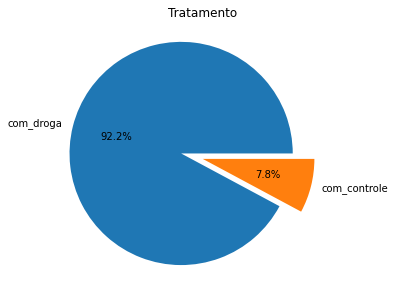

In [ ]:
# Criando um gráfico de pizza para ver a distribuião dos dados

fig1 = dados['tratamento'].value_counts()
plt.figure (figsize= (5, 5)) # função do matplotlib que muda o tamanho da imagem
labels = ['com_droga', 'com_controle'] # colocar o nome em cada fatia
plt.axis ('equal') # para o gráfico sair circular e não oval
plt.title ('Tratamento')  # titulo do gráfico
explode = [0.2, 0] # deixar uma parte em evidencia

# autopct -> mostra os valores em %
plt.pie(fig1, labels=labels, explode = explode, autopct='%1.1f%%')
plt.show

Aqui podemos ver que existem dois tipos de tratamento com e sem droga, como tínhamos visto inicialmente.
O tipo controle é uma técnica estatística em que isolamos as outras variáveis e observamos apenas a variável de interesse.

Já com_droga é o tipo de composto que está sendo testado. Podemos ver que o método com_droga foi mais usado que o com_controle, o que corresponde a 92,2% do estudo. 

Essa disparidade de valores está relacionada com o fato de haver muitas combinações com os tipos de drogas, dose e tempo. O que faz com que o grupo controle parece ser pequeno.

---

***Investigar por que a classe tratamento parece tão desbalanceada***

A classe desbalanceada ocorre quando temos um dataset que possui muitos exemplos de uma classe e poucos exemplos da outra classe. Isso é bem comum quando temos dados de fraudes financeiras, por exemplo, que os casos de fraudes é menor que as transações licitas.

Entretanto nesse estudo, há muitas combinações de variáveis:  tratamentoXdose, tratamentoXdroga e tratamentoXtempo. Então é necessário fazer a verificação de como está a distribuição dessas combinações, para então afirmar se a classe tratamento está ou não desbalanceada. POrtando após a análise das demais variáves de entrada será analisada a sua interação com a variável tratamento

---



### ***Coluna Tempo***

In [ ]:
# verificar quais os dados da coluna tempo
dados ['tempo'].unique() 

array([24, 72, 48])

In [ ]:
# quantos de cada tipo
dados  ['tempo'].value_counts() 

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [ ]:
# normalizando os dados par ter uma padrão de comparação
dados['tempo'].value_counts(normalize = True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

In [ ]:
dados['tempo'].value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

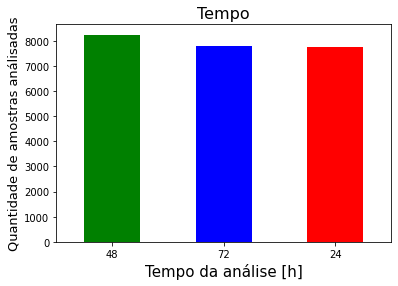

In [ ]:
dados['tempo'].value_counts().plot.bar(color=['green','blue', 'red'], linewidth = 0.2 )

plt.title('Tempo', fontsize = 16)
plt.xlabel('Tempo da análise [h]', fontsize = 15)
plt.ylabel('Quantidade de amostras análisadas', fontsize = 13)
plt.xticks(rotation=0) # para os números ficarem em horizontal

Vemos que existem 3 tempos de tempo (24,72 e 48) horas, se são referente ao tempo de exposição da cultura ao composto aplicado.

O número de vezes que cada tipo é usado é bem parecido, porém a mais utilizada é o tempo de 48. 



##### Interação tratamento*tempo
 

In [ ]:
# Verificando quantas amostras utilizam o tratmento com_controle

T_com_controle24 = len (dados.query ('tratamento == "com_controle"  & tempo == 24 ') )
T_com_controle48 = len (dados.query ('tratamento == "com_controle"  & tempo == 48 ') )
T_com_controle72 = len (dados.query ('tratamento == "com_controle"  & tempo == 72 ') )

controle_24 = (T_com_controle24 / 1866 )* 100
controle_48 = (T_com_controle48 / 1866 )* 100
controle_72 = (T_com_controle72 / 1866 )* 100

print (f' A porcentagem de amostras do grupo controle com tempo de 24 é: {controle_24: .2f}%')
print (f' A porcentagem de amostras do grupo controle com tempo de 48 é: {controle_48: .2f}%')
print (f' A porcentagem de amostras do grupo controle com tempo de 72 é: {controle_72: .2f}%')


 A porcentagem de amostras do grupo controle com tempo de 24 é:  32.48%
 A porcentagem de amostras do grupo controle com tempo de 48 é:  34.73%
 A porcentagem de amostras do grupo controle com tempo de 72 é:  32.80%


In [ ]:
# Verificando quantas amostras utilizam o tratmento com_droga

T_com_droga24 = len (dados.query ('tratamento == "com_droga"  & tempo == 24 ') )
T_com_droga48 = len (dados.query ('tratamento == "com_droga"  & tempo == 48 ') )
T_com_droga72 = len (dados.query ('tratamento == "com_droga"  & tempo == 72 ') )

droga_24 = (T_com_droga24 / 21948 )* 100
droga_48 = (T_com_droga48 / 21948 )* 100
droga_72 = (T_com_droga72/   21948)* 100

print (f' A porcentagem de amostras do grupo com droga com tempo de 24 é: {droga_24: .2f}%')
print (f' A porcentagem de amostras do grupo com droga com tempo de 48 é: {droga_48: .2f}%')
print (f' A porcentagem de amostras do grupo com droga com tempo de 72 é: {droga_48: .2f}%')

 A porcentagem de amostras do grupo com droga com tempo de 24 é:  32.65%
 A porcentagem de amostras do grupo com droga com tempo de 48 é:  34.64%
 A porcentagem de amostras do grupo com droga com tempo de 72 é:  34.64%


Com relação a interação tratamento*tempo, observa-se as porcentagens são semelhantes, então para essa interação não há desbalanceamento. 

Além disso é possível observar que os tempos utilizados em cada um dos tratamento é bem semelhante.

### ***Coluna Dose***

In [ ]:
# verificar quais os dados da coluna dose
dados ['dose'].unique() 

array(['D1', 'D2'], dtype=object)

In [ ]:
# quantos de cada tipo
dados  ['dose'].value_counts() 

D1    12147
D2    11667
Name: dose, dtype: int64

In [ ]:
# normalizando os dados par ter uma padrão de comparação
dados['dose'].value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

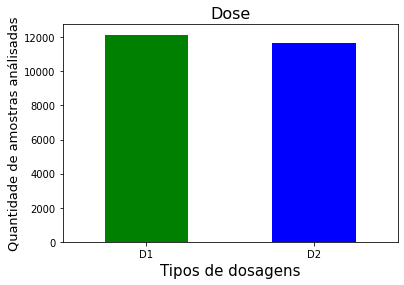

In [ ]:
dados['dose'].value_counts().plot.bar(color=['green','blue', 'red'], linewidth = 0.2 )

plt.title('Dose', fontsize = 16)
plt.xlabel('Tipos de dosagens', fontsize = 15)
plt.ylabel('Quantidade de amostras análisadas', fontsize = 13)
plt.xticks(rotation=0) 

É possivel observar que temos duas dosagens a D1 e a D2, sendo a D1  a mais utilizada


##### Interação tratamento*dose

In [ ]:
# Verificando quantas amostras utilizam o tratmento com_controle

T_com_controle = len (dados.query ('tratamento == "com_controle"  & dose == "D1" ') )
controle_D1 = (T_com_controle / 1866 )* 100
print (f' A porcentagem de amostras do grupo controle com dosagem D1 é: {controle_D1: .2f}%')

controle_D2 = 100 - controle_D1 
print (f' A porcentagem de amostras do grupo controle com dosagem D2 é: {controle_D2: .2f}%')

 A porcentagem de amostras do grupo controle com dosagem D1 é:  50.96%
 A porcentagem de amostras do grupo controle com dosagem D2 é:  49.04%


In [ ]:
# Verificando quantas amostras utilizam o tratmento com_droga

T_com_droga = len (dados.query ('tratamento == "com_droga"  & dose == "D1" ') )
droga_D1 = (T_com_droga / 21948 )* 100
print (f' A porcentagem de amostras do grupo com droga com dosagem D1 é: {droga_D1: .2f}%')

droga_D2 = 100 - droga_D1
print (f' A porcentagem de amostras do grupo com droga com dosagem D2 é: {droga_D2: .2f}%')

 A porcentagem de amostras do grupo com droga com dosagem D1 é:  51.01%
 A porcentagem de amostras do grupo com droga com dosagem D2 é:  48.99%


Com relação a interação tratamento*dose, observa-se as porcentagens são semelhantes, então para essa interação não há desbalanceamento.

Além disso, podemos observar que os valores de doagem estão semelhantes, sendo que as pequenas diferenças existentes podemos atribuir a variável tempo, a qual não está sendo análisa em conjunto. 

### ***Coluna Droga***

In [ ]:
# verificar quais os dados da coluna droga
dados ['droga'].unique() 

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [ ]:
# quantos de cada tipo
dados ['droga'].value_counts() 

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
67c4672f3       1
d532d49de       1
98c94f9b9       1
e68b58a8f       1
91a585117       1
Name: droga, Length: 3289, dtype: int64

In [ ]:
# normalizando os dados par ter uma padrão de comparação
dados['droga'].value_counts(normalize = True)

cacb2b860    0.078357
87d714366    0.030150
9f80f3f77    0.010330
8b87a7a83    0.008524
5628cb3ee    0.008482
               ...   
67c4672f3    0.000042
d532d49de    0.000042
98c94f9b9    0.000042
e68b58a8f    0.000042
91a585117    0.000042
Name: droga, Length: 3289, dtype: float64

No caso da droga, vemos que existem diversos tipos de droga e que todas possuem código estranho, isso é para descaracterizar os dados e fazer com que a análise seja menos tendenciosa.
Podemos observar que no todo temos 3289 diferentes drogas (Length: 3289) e que a mais utilizada é a cacb2b860.

Como existem diversas drogas, através de um histograma podemos ver a distribuição dos dados

In [ ]:
fig_histograma = px.histogram(dados, x="droga", nbins=100)

fig_histograma.show() # para não mostrar as informações acima do gráfico

Pelo histograma parace que a maior parte das drogas é testada somente 6 vezes.

In [ ]:
# ver quantas vezes uma droga é aplicada
qdtt_droga = dados ['droga'].value_counts()
qdtt_droga

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
67c4672f3       1
d532d49de       1
98c94f9b9       1
e68b58a8f       1
91a585117       1
Name: droga, Length: 3289, dtype: int64

In [ ]:
# somar quantas vezes uma droga é testada somente 6 vez
qdtt_droga = dados ['droga'].value_counts()
droga_igual_6 = qdtt_droga  == 6 # ver quantas drogas são aplicas só 1 vez (resp: true/false)
np.count_nonzero(droga_igual_6) # somar os True


2774

In [ ]:
# somar quantas vezes quantas drogas são testada mais que 6 vez

droga_mais_6 = qdtt_droga  > 6
np.count_nonzero(droga_mais_6) 

312

In [ ]:
# somar quantas vezes quantas drogas são testada menos que 6 vez

droga_menos_6 = qdtt_droga  < 6
np.count_nonzero(droga_menos_6) 

203

Através do histograma podemos observar que a maior parte das drogas utilizadas foi aplicada em um pequeno número de amostras. Pela análise posterior foi possível verificar que o número de drogas usadas exatamente 6 vezes é igual a 2774,  ​mais de 6 vezes 312 tipos de drogas e  menos de 6 vezes 203 tipos.

##### Interação tratamento*droga

Como existe muitos tipos de droga, primeiramente vamos verificar as 10 drogas mais utilizadas.

In [ ]:
# descobrindo quem são os 10 compostos mais utilizados:

# 1º eu faço um value_counts para filtrar todas as drogas
# 2º eu aplico o index, para me retornar somente os nomes das drogas ( não queremos os valores, só nomes agora)
# 3º faço um fatiamento para pegar as 10 drogas mais usadas

top_10 = dados ['droga'].value_counts().index[0:10]
top_10

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee',
       'd08af5d4b', '292ab2c28', 'd50f18348', 'd1b47f29d', '67c879e79'],
      dtype='object')

In [ ]:
# fazer uma query para ver só aquelas amostras que utilizaram os top 10

top_10_query = dados.query ('droga in @top_10')


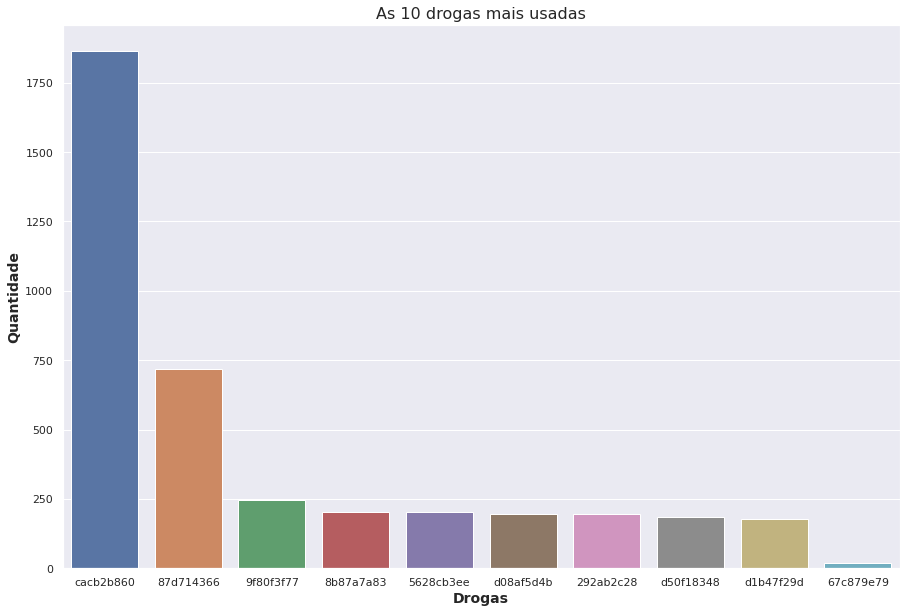

In [ ]:
# crinado um gráfico para facilitar a vidualização das drogas mais utilizadas

sns.set() # para trazer as confirgurações padrão do gráfico do seaborn que o colab não está importando
plt.figure (figsize= (15, 10)) # função do matplotlib que muda o tamanho da imagem
fig= sns.countplot (x = 'droga', data = top_10_query, order=top_10_query ['droga'].value_counts().index) # criar gráfico



fig.set_title('As 10 drogas mais usadas', fontsize = 16)# nome do título

fig.set_ylabel('Quantidade', fontsize=14, fontweight = 'bold')
fig.set_xlabel('Drogas', fontsize=14, fontweight = 'bold')



plt.show()

Podemos ver que a droga cacb2b860 se destaca das demais então vamos verificar o seu uso nos tipos de tratamento



In [ ]:
# Droga cacb2b860 no tramento com_controle
T_com_controle = len (dados.query ('tratamento == "com_controle"  & droga == "cacb2b860" ') )
print (f' A quantidade da droga cacb2b860 no tramento com_controle  é: {T_com_controle}')


# Droga cacb2b860 no tramento com_droga
T_com_droga = len (dados.query ('tratamento == "com_droga"  & droga == "cacb2b860" ') )
print (f' A quantidade da droga cacb2b860 no tramento com_droga é: {T_com_droga}')

 A quantidade da droga cacb2b860 no tramento com_controle  é: 1866
 A quantidade da droga cacb2b860 no tramento com_droga é: 0


Podemos verificar que a droga cacb2b860 só foi utilizada no teste de controle, e além disso, se compararmos a quantidade de amostras do tratamento com_controle (com_controle = 1866), podemos constatar que todas as amostras de controle foram realizadas utilizando essa droga.

Agora para compreender melhor o que essas esses dados significam temos que analisar a área de origem dos dados. 

No caso, os dados são dados referentes a área de farmácia, então pelas linhas podemos supor que estamos analisando dados do teste de medicamentos (droga), sendo que o "paciente" pode ter tomado a droga em estudo (com_droga) ou "placebo" (com_controle), pois é a forma que se tem para saber se o remédio funciona ou não - mantendo um grupo sob as mesmas condições, mas sem uma das variáveis, ou seja, aquela que está sendo analisada/estudada.

Como temos as coluna drogas e tempo, podemos supor que cada linha seja referente a um tipo de tratamento que o "paciente" está sendo submetido. Como estão sendo estuados tempos e doses o nosso "paciente" no caso são cultura de células, que é como as pesquisas sobre medicamentos ocorrem, onde são testados vários tipos de doses, tempos  e concentrações. E a nossa droga na verdade é o composto que está sendo estudado.

Por isso o ideal é passa a chamar a coluna drogas de composto, que seria mais adequado.Portanto, antes de inicializar a análise estatística mudaremos o nome da coluna 




### ***Coluna G***

In [ ]:
# verificar quais os dados da coluna G, vou analisar a g0
dados ['g0'].unique() 

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

In [ ]:
# quantos de cada tipo
dados  ['g0'].value_counts() 

 0.0000     22
-0.3372     15
 10.0000    14
-1.0040     10
-1.0850      9
            ..
-0.5619      1
 0.5292      1
-0.1732      1
-0.3844      1
 0.1284      1
Name: g0, Length: 14367, dtype: int64

In [ ]:
# normalizando os dados par ter uma padrão de comparação
dados['g0'].value_counts(normalize = True)

 0.0000     0.000924
-0.3372     0.000630
 10.0000    0.000588
-1.0040     0.000420
-1.0850     0.000378
              ...   
-0.5619     0.000042
 0.5292     0.000042
-0.1732     0.000042
-0.3844     0.000042
 0.1284     0.000042
Name: g0, Length: 14367, dtype: float64

In [ ]:
dados.query('g0 > 0')

id    tratamento  tempo dose  ...     c96     c97     c98     c99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
6      id_001bd861f     com_droga     24   D2  ...  2.4670  0.0357  0.1351 -0.3179
7      id_0020d0484     com_droga     48   D1  ...  0.6633  0.4562 -0.9622  0.0260
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23807  id_fff7e6992     com_droga     48   D1  ...  0.3738  0.8636  0.4494  0.1218
23808  id_fff8c2444     com_droga     72   D1  ... -0.7415  0.8413 -0.4259  0.2434
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740

[11769 rows x 877 columns]

In [ ]:
dados.query('g0 < 0')

id tratamento  tempo dose  ...     c96     c97     c98     c99
3      id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
5      id_001762a82  com_droga     24   D1  ...  1.2120  0.3765  0.7848  1.3990
8      id_00224bf20  com_droga     48   D1  ... -0.1167 -0.1241 -0.6420  0.5543
9      id_0023f063e  com_droga     48   D2  ... -0.8745 -0.2716  0.0189 -2.0000
...             ...        ...    ...  ...  ...     ...     ...     ...     ...
23800  id_fff1a3307  com_droga     72   D2  ...  0.3823  0.8707  0.8011  0.4942
23804  id_fff506720  com_droga     24   D1  ... -0.4097  0.2282 -0.3213 -0.0836
23806  id_fff790a17  com_droga     48   D2  ...  1.2630  0.7823 -0.6947  0.7277
23810  id_fffb70c0c  com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23813  id_ffffdd77b  com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[12023 rows x 877 columns]

In [ ]:
dados.query('g0 == 0')

id    tratamento  tempo dose  ...     c96     c97     c98     c99
894    id_090d5faab     com_droga     72   D1  ... -1.0650 -1.8200 -1.3260 -0.7249
1380   id_0e68cbbb8     com_droga     72   D2  ... -2.3280 -1.9860 -3.1180  0.4858
2201   id_1788469a3     com_droga     24   D1  ...  0.4966 -1.2220  0.9120 -0.1879
3585   id_267bbbda0     com_droga     24   D2  ...  0.6269 -0.1610 -0.7621  0.4061
4886   id_34a35a55c     com_droga     72   D2  ...  0.3130  0.2335  0.7553  0.9155
5595   id_3c3423a3d     com_droga     24   D1  ... -1.0190 -1.5860 -0.2275  0.8549
5667   id_3d03b67a9     com_droga     72   D1  ...  0.3007  0.8952  0.1277 -0.2204
6289   id_438f79667     com_droga     72   D2  ... -2.4300 -1.1520 -0.8239 -0.9811
8022   id_560168f5c     com_droga     48   D2  ... -0.2602 -0.9836 -0.0871 -0.3563
9338   id_644aee88b     com_droga     48   D1  ...  0.4707  1.1140  0.8708  0.7890
11526  id_7c44cca35     com_droga     72   D2  ...  0.4692  0.4327  0.1287  0.6923
12161  id_82eed054c     com_droga     72   D2  ...  0.6777 -0.2139  0.0767  0.2294
12242  id_83e08ccd0     com_droga     72   D2  ...  0.8332 -0.3032  2.1470  1.1410
14453  id_9ba4eb05c     com_droga     72   D2  ...  0.5608  0.8521 -0.4655  0.1231
14685  id_9de794bc7     com_droga     24   D2  ... -1.2060 -0.2052 -2.6380 -1.3000
15027  id_a17eaac85     com_droga     72   D1  ... -0.3088 -0.3370 -0.0171 -0.3282
15364  id_a55b90c9c     com_droga     72   D2  ...  0.9921 -0.3074 -0.7528  0.3287
15619  id_a80d13923     com_droga     24   D2  ...  0.0194  0.3133  0.0423 -0.5011
15796  id_a9d1552ce     com_droga     24   D1  ...  0.3014 -0.5699  0.0719  0.7200
17253  id_b9d0ce70e     com_droga     24   D1  ... -1.1860 -0.9519 -0.4383  0.1101
17815  id_bf46bba1d  com_controle     72   D2  ...  1.7960  0.3678  0.2322 -0.7664
22038  id_ec87d8c78     com_droga     24   D1  ...  0.2170  0.7783 -0.7016  0.8652

[22 rows x 877 columns]

In [ ]:
fig_histograma2 = px.histogram(dados, x="g0", nbins=200)
fig_histograma2.show()

In [ ]:
# Grenado o gráfico da distribuição normal para visualizar a distribuição da variável 
label = ["Distribuição g0 "]
fig_normal = ff.create_distplot ([dados.g0], label)
fig_normal

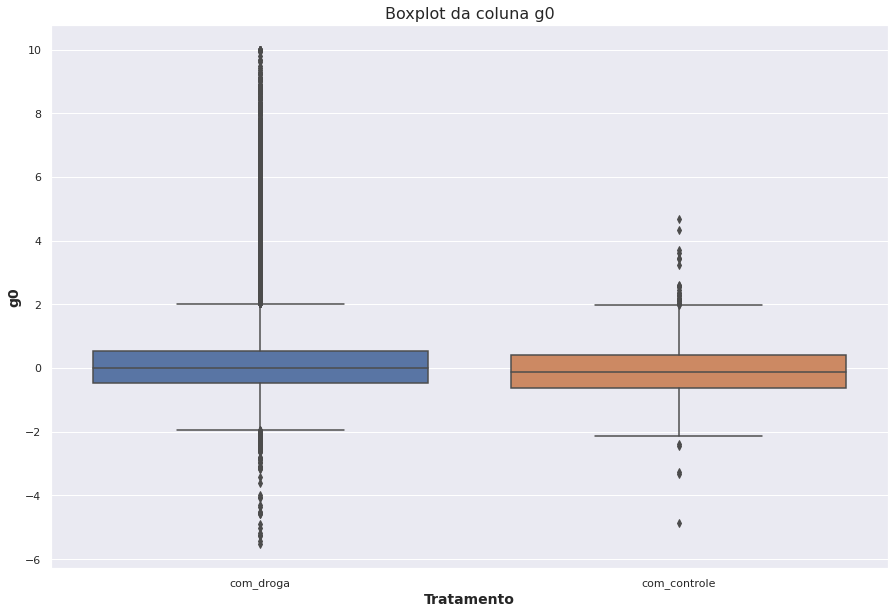

In [ ]:
# box-plot da coluna g0 e tratamento

sns.set()
plt.figure (figsize= (15, 10)) 
fig= sns.boxplot(y='g0', x='tratamento', data=dados)

fig.set_title('Boxplot da coluna g0', fontsize = 16)# nome do título

fig.set_ylabel('g0', fontsize=14, fontweight = 'bold')
fig.set_xlabel('Tratamento', fontsize=14, fontweight = 'bold')

plt.show()

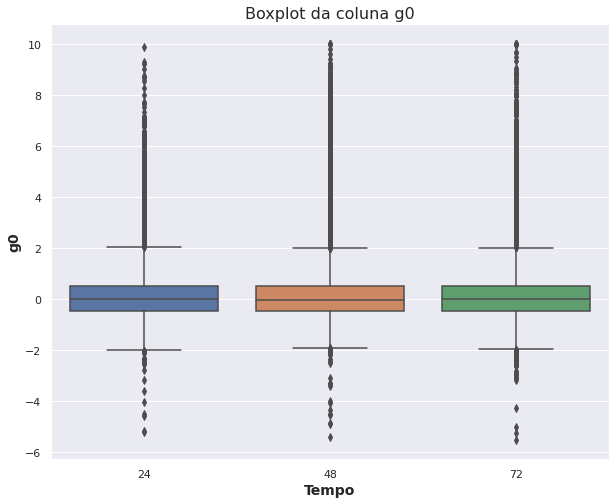

In [ ]:
# box-plot da coluna g0 e tempo

sns.set()
plt.figure (figsize= (10, 8)) 
fig= sns.boxplot(y='g0', x='tempo', data=dados)

fig.set_title('Boxplot da coluna g0', fontsize = 16)# nome do título

fig.set_ylabel('g0', fontsize=14, fontweight = 'bold')
fig.set_xlabel('Tempo', fontsize=14, fontweight = 'bold')

plt.show()

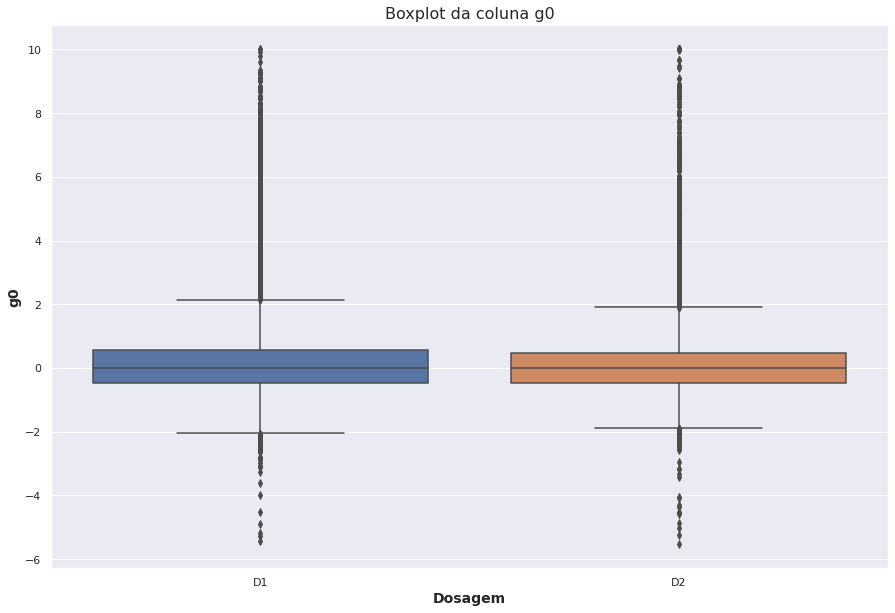

In [ ]:
# box-plot da coluna g0 e dose

sns.set()
plt.figure (figsize= (15, 10)) 
fig= sns.boxplot(y='g0', x='dose', data=dados)

fig.set_title('Boxplot da coluna g0', fontsize = 16)# nome do título

fig.set_ylabel('g0', fontsize=14, fontweight = 'bold')
fig.set_xlabel('Dosagem', fontsize=14, fontweight = 'bold')

plt.show()

A coluna 'g' se refere ao gene da célula (trechos do DNA), sendo que cada 'g' representa um gene. Os valores são suas expressões gênicas, que dependendo do estimulo que ele receber irá ter uma resposta genética (expressão gênica) diferente, ou seja, ele pode produzir mais ou menos de alguma coisa, como por exemplo a insulina quando estamos sem comer (pouca qntdd) ou quando comemos (bastante qntdd).

Então, um valor negativo de "g0" pode significar que a expressão dele foi menor/reduzida, sendo que a comparação é sempre em relação ao grupo controle. 

Através dos dados da coluna g0, observa-se que os valores estão variando entre -6 e 10. Além de que 11769  das amostras apresentaram uma resposta positiva, 12023 um resposta negativa e 22 nulos (0,00)

Os análisar os gráficos de boxplot, observa-se que os resultados obtidos como tramento com droga apresentou uma maaior variação dos valores. Já quando análisado com base no tempo e na dose, não se observa a mesma dispeção dos dados.
Mas essas análise mostram que devoms invertigar mais sobre os que está acontecendo com esses dados, sendo que uma dessas maneiras é comprar os reusltados usando mais de uma variável como dose e tempo em simultaneo.

### ***Coluna C***

In [ ]:
# verificar quais os dados da coluna C, vou analisar a c0
dados ['c0'].unique() 

array([-0.06  ,  0.0927, -0.1312, ...,  0.3509,  0.9538, -2.389 ])

In [ ]:
# quantos de cada tipo
dados  ['c0'].value_counts() 

-10.0000    224
-1.1180      10
 1.0200       9
 1.0100       9
-1.0830       9
           ... 
-0.9057       1
-0.0710       1
 0.4981       1
-0.8023       1
 0.9321       1
Name: c0, Length: 14421, dtype: int64

In [ ]:
# normalizando os dados par ter uma padrão de comparação
dados['c0'].value_counts(normalize = True)

-10.0000    0.009406
-1.1180     0.000420
 1.0200     0.000378
 1.0100     0.000378
-1.0830     0.000378
              ...   
-0.9057     0.000042
-0.0710     0.000042
 0.4981     0.000042
-0.8023     0.000042
 0.9321     0.000042
Name: c0, Length: 14421, dtype: float64

In [ ]:
dados.query ('c0 > 0')

id    tratamento  tempo dose  ...     c96     c97     c98     c99
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
5      id_001762a82     com_droga     24   D1  ...  1.2120  0.3765  0.7848  1.3990
6      id_001bd861f     com_droga     24   D2  ...  2.4670  0.0357  0.1351 -0.3179
7      id_0020d0484     com_droga     48   D1  ...  0.6633  0.4562 -0.9622  0.0260
10     id_002452c7e     com_droga     72   D2  ...  0.6648  0.0651 -0.0125  0.2600
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23808  id_fff8c2444     com_droga     72   D1  ... -0.7415  0.8413 -0.4259  0.2434
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740

[11792 rows x 877 columns]

In [ ]:
dados.query ('c0 < 0')

id tratamento  tempo dose  ...     c96     c97     c98     c99
0      id_000644bb2  com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
2      id_000a6266a  com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3      id_0015fd391  com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3  com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
8      id_00224bf20  com_droga     48   D1  ... -0.1167 -0.1241 -0.6420  0.5543
...             ...        ...    ...  ...  ...     ...     ...     ...     ...
23799  id_fff183968  com_droga     48   D2  ... -0.8722  0.0799 -1.0630 -0.5463
23802  id_fff3976bd  com_droga     24   D1  ... -8.4480 -4.4550 -5.7930 -3.7000
23803  id_fff485da4  com_droga     48   D1  ... -0.0557  0.6457 -0.4622  0.8154
23804  id_fff506720  com_droga     24   D1  ... -0.4097  0.2282 -0.3213 -0.0836
23813  id_ffffdd77b  com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[12022 rows x 877 columns]

In [ ]:
dados.query ('c0 == 0')

Empty DataFrame
Columns: [id, tratamento, tempo, dose, droga, g0, g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12, g13, g14, g15, g16, g17, g18, g19, g20, g21, g22, g23, g24, g25, g26, g27, g28, g29, g30, g31, g32, g33, g34, g35, g36, g37, g38, g39, g40, g41, g42, g43, g44, g45, g46, g47, g48, g49, g50, g51, g52, g53, g54, g55, g56, g57, g58, g59, g60, g61, g62, g63, g64, g65, g66, g67, g68, g69, g70, g71, g72, g73, g74, g75, g76, g77, g78, g79, g80, g81, g82, g83, g84, g85, g86, g87, g88, g89, g90, g91, g92, g93, g94, ...]
Index: []

[0 rows x 877 columns]

In [ ]:
fig_histograma3 = px.histogram(dados, x="c0", nbins=200)
fig_histograma3.show()

In [ ]:
label = ["Distribuição c0 "]
fig_normal2 = ff.create_distplot ([dados.c0], label)
fig_normal2

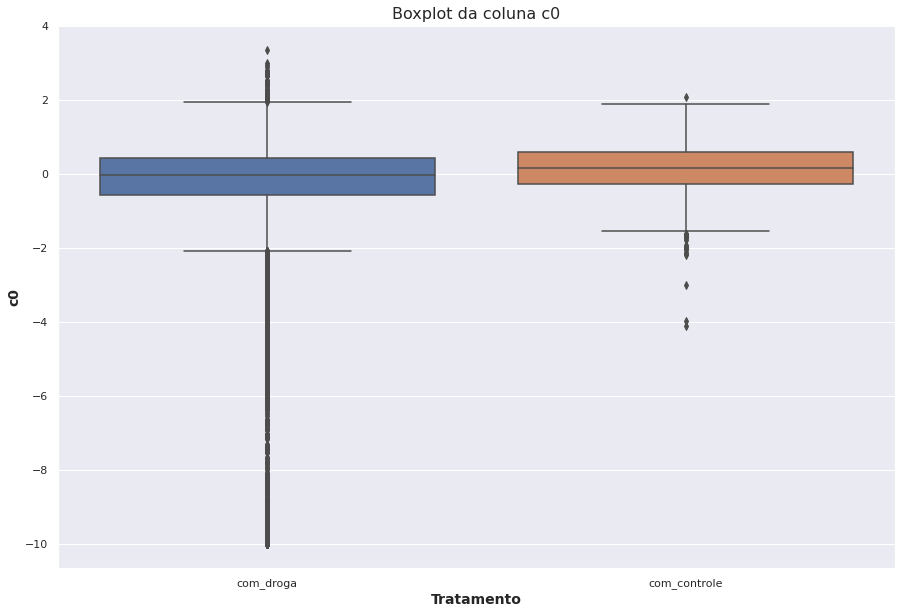

In [ ]:
# box-plot da coluna g0 e tratamento

sns.set()
plt.figure (figsize= (15, 10)) 
fig= sns.boxplot(y='c0', x='tratamento', data=dados)

fig.set_title('Boxplot da coluna c0', fontsize = 16)

fig.set_ylabel('c0', fontsize=14, fontweight = 'bold')
fig.set_xlabel('Tratamento', fontsize=14, fontweight = 'bold')

plt.show()

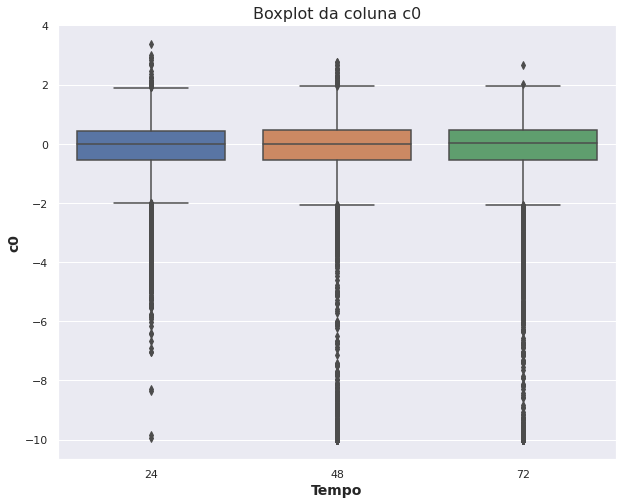

In [ ]:
# box-plot da coluna g0 e tempo

sns.set()
plt.figure (figsize= (10, 8)) 
fig= sns.boxplot(y='c0', x='tempo', data=dados)

fig.set_title('Boxplot da coluna c0', fontsize = 16)

fig.set_ylabel('c0', fontsize=14, fontweight = 'bold')
fig.set_xlabel('Tempo', fontsize=14, fontweight = 'bold')

plt.show()

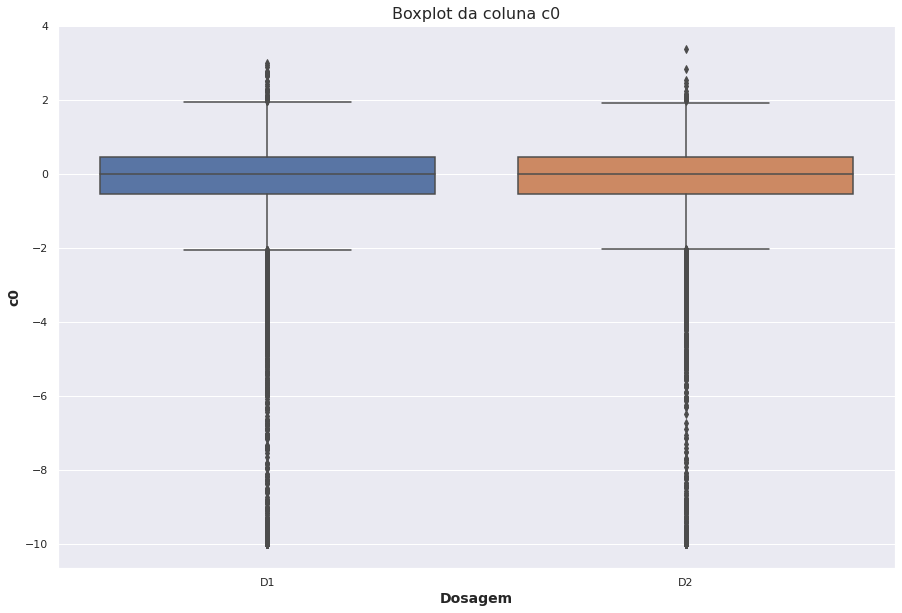

In [ ]:
# box-plot da coluna c0 e dose

sns.set()
plt.figure (figsize= (15, 10)) 
fig= sns.boxplot(y='c0', x='dose', data=dados)

fig.set_title('Boxplot da coluna c0', fontsize = 16)# nome do título

fig.set_ylabel('c0', fontsize=14, fontweight = 'bold')
fig.set_xlabel('Dosagem', fontsize=14, fontweight = 'bold')

plt.show()

As colunas C são referentes ao tipo de célula que foi utilizado (ex: células tumorais, células com alguma mutação, células de rim, fígado, etc),e o valor corresponde a viabilidade celular, que é uma a medida da proporção de células vivas saudáveis ​​dentro de uma população, ou seja, quantas células sobreviveram.

A forma correta de se analisar, comparar a verificar a viabilidade da celular que que está utilizando droga e com tratamento controle. Se o valor de "c0" que recebeu alguma droga for menor do que o "c0" do controle, pode nos indicar que menos células sobreviveram. 

Em geral, não houve valores nulos, 12022 são negativos e 11792 são positivos, mas só um teste estatístico para dizer se isso é estatisticamente significante.

Pelo gráfico de boxplot, observa-se que ouve uma maior variação dos dados com_droga e em relação aos tempos e doses as variações são similares.

Assim como a análise da coluna g0, devoms invertigar mais sobre os que está acontecendo com esses dados.

### Conclusão preliminar sobre as colunas

* Existem dois tipos de tratamento com droga e controle. E apesar da diferença dos valores entre os tipos, análise mostraram que eles estão balanceados 

* Existem 3 tempos de tempo (24,72 e 48) e que o número de vezes que cada tipo é usado é bem parecido.

* Sabemos também que temos duas dosagens a D1 e a D2, novamente os valores estão próximos.

* Já no caso da droga, podemos observar que no todo temos 3289 tipos drogas testadas e que a mais utilizada é a cacb2b860, a qual foi utilizada somente nos teste de controle.

* A coluna 'g' se refere ao gene da célula e a 'c' ao tipo de célula que foi utilizado.
** Na coluna 'g' podemos observar a expressão gênica de cada gene, o qual irá mudar em função do estimulo recebido. Um valor valor negativo de "g" pode significar que a expressão dele foi menor/reduzida, em comparação ao grupo controle. 
**  Na coluna 'c' estamos verificando a viabilidade celular, ou seja, quantas células sobrevivem após o tratamento. Comparando os resultados das células controle com o um uma que usou uma droga, podemos determinar quantas células sobreviveram ao tratamento. 
** Em ambos os casos para se determinar de a droga estudada foi efetiva ou não é necessário fazer uma comparação entre os tipos de tratamento para cada tipo de célula.


##### Colunas:
- id = Identificador do experimento
- tempo = Tempo de espera para análise : 24, 48 e 72h
- tratamento = com_droga e com_controle
- dose = Diferentes Dosagens: D1 e D2
- drogas = Tipos de substâncias testadas
- g = Expressão gênica
- c = Viabilidade celular

---  


# ANALISE DAS COLUNAS C E G

In [ ]:
# criando a copia do arquivo, para poder trocar o nome da coluna droga e manter os dados originais

dados_editados = dados.copy()
dados_editados

id    tratamento  tempo dose  ...     c96     c97     c98     c99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3      id_0015fd391     com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3     com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[23814 rows x 877 columns]

In [ ]:
# trocando  o nome da coluna
mapa = {'droga': 'composto'}
dados_editados.rename (columns=mapa, inplace=True)
dados_editados

id    tratamento  tempo dose  ...     c96     c97     c98     c99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
3      id_0015fd391     com_droga     48   D1  ... -1.6210 -0.8784 -0.3876 -0.8154
4      id_001626bd3     com_droga     72   D2  ...  0.1094  0.2885 -0.3786  0.7125
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23810  id_fffb70c0c     com_droga     24   D2  ... -0.2084 -0.1224 -0.2715  0.3689
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740
23813  id_ffffdd77b     com_droga     72   D1  ... -3.5770 -0.4775 -2.1500 -4.2520

[23814 rows x 877 columns]

## Análise descritiva 

Através da análise da estatistica descritiva dos dados é possivel termos uma ideia do comportamento dos dados.

In [ ]:
# Análise descritiva dos dados

dados_editados.describe()

tempo            g0  ...           c98           c99
count  23814.000000  23814.000000  ...  23814.000000  23814.000000
mean      48.020156      0.248366  ...     -0.470252     -0.301505
std       19.402807      1.393399  ...      1.834828      1.407918
min       24.000000     -5.513000  ...    -10.000000    -10.000000
25%       24.000000     -0.473075  ...     -0.592600     -0.562900
50%       48.000000     -0.008850  ...      0.014000     -0.019500
75%       72.000000      0.525700  ...      0.461275      0.438650
max       72.000000     10.000000  ...      3.111000      3.805000

[8 rows x 873 columns]

Para uma melhor visualização de como está a distribuição dos dados é possvel criar hitogramas com base na estatística descritiva dos dados, como a média, mediana (50%), minimo, máximo e o desvio padrão

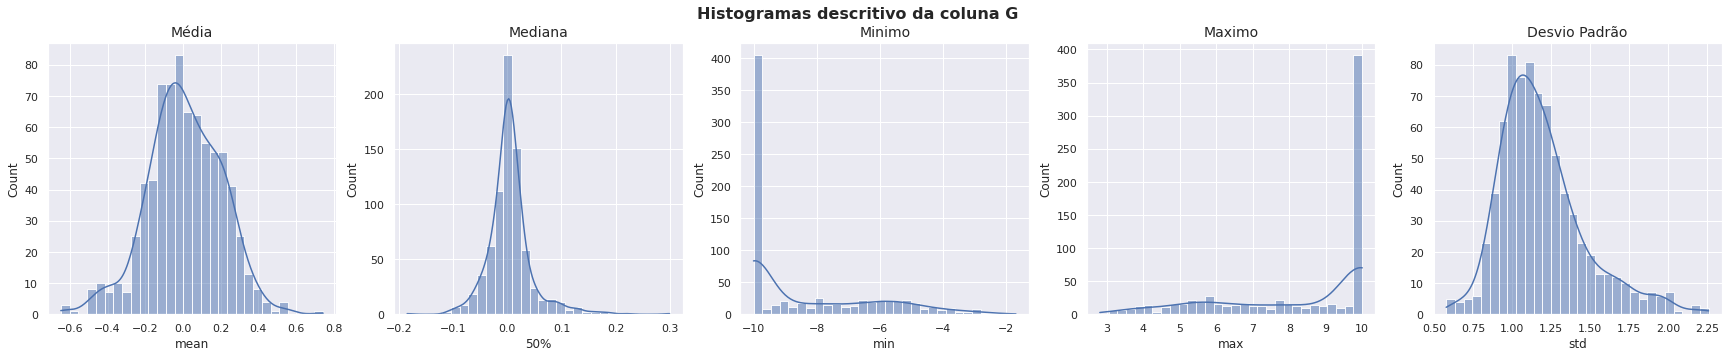

In [ ]:
# criando um histograma para as respostas média, mediana, minimo, máximo e descio padrão da coluna G

fig, ax = plt.subplots(1,5,figsize=(30,5))
plt.suptitle('Histogramas descritivo da coluna G', fontsize=16, fontweight='bold')

sns.histplot(data=dados_editados, x=(dados_editados.loc[:,'g0':'g771'].describe().T['mean']), ax = ax[0], kde=True, bins=30).set_title('Média', fontsize=14) # hist da média
sns.histplot(data=dados_editados, x=(dados_editados.loc[:,'g0':'g771'].describe().T['50%']), ax = ax[1], kde=True, bins=30).set_title('Mediana', fontsize=14) # hist da mediana
sns.histplot(data=dados_editados, x=(dados_editados.loc[:,'g0':'g771'].describe().T['min']), ax = ax[2], kde=True, bins=30).set_title('Minimo', fontsize=14) # hist da minimo
sns.histplot(data=dados_editados, x=(dados_editados.loc[:,'g0':'g771'].describe().T['max']), ax = ax[3], kde=True, bins=30).set_title('Maximo', fontsize=14) # hist da máximo
sns.histplot(data=dados_editados, x=(dados_editados.loc[:,'g0':'g771'].describe().T['std']), ax = ax[4], kde=True, bins=30).set_title('Desvio Padrão', fontsize=14) # hist da desvpad  

plt.show()   

                    

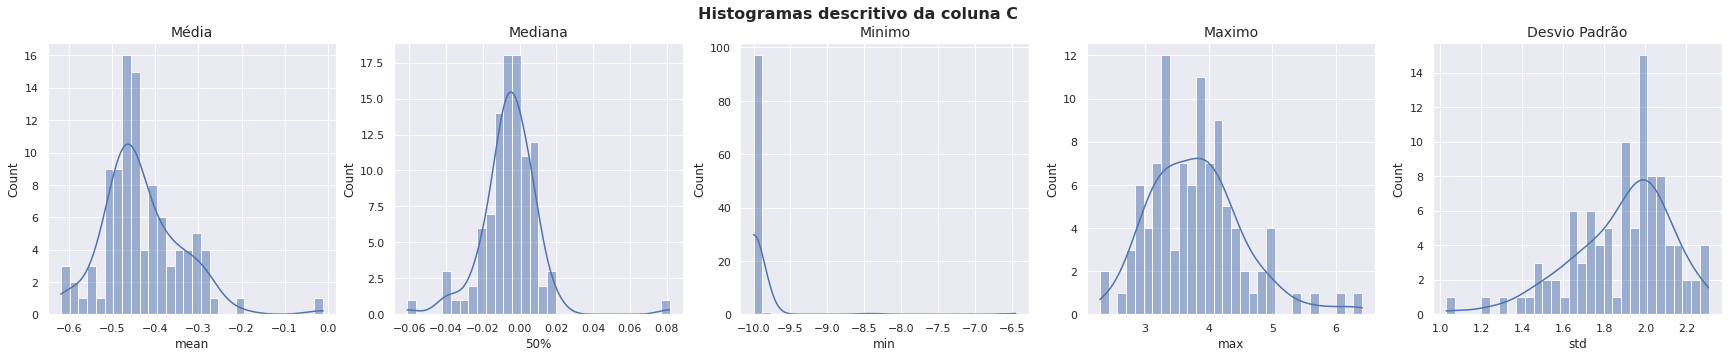

In [ ]:
# criando um histograma para as respostas média, mediana, minimo, máximo e descio padrão da coluna C

fig, ax = plt.subplots(1,5,figsize=(30,5))
plt.suptitle('Histogramas descritivo da coluna C', fontsize=16, fontweight='bold')

sns.histplot(data=dados_editados, x=(dados_editados.loc[:,'c0':'c99'].describe().T['mean']), ax = ax[0], kde=True, bins=30).set_title('Média', fontsize=14) # hist da média
sns.histplot(data=dados_editados, x=(dados_editados.loc[:,'c0':'c99'].describe().T['50%']), ax = ax[1], kde=True, bins=30).set_title('Mediana', fontsize=14) # hist da mediana
sns.histplot(data=dados_editados, x=(dados_editados.loc[:,'c0':'c99'].describe().T['min']), ax = ax[2], kde=True, bins=30).set_title('Minimo', fontsize=14) # hist da minimo
sns.histplot(data=dados_editados, x=(dados_editados.loc[:,'c0':'c99'].describe().T['max']), ax = ax[3], kde=True, bins=30).set_title('Maximo', fontsize=14) # hist da máximo
sns.histplot(data=dados_editados, x=(dados_editados.loc[:,'c0':'c99'].describe().T['std']), ax = ax[4], kde=True, bins=30).set_title('Desvio Padrão', fontsize=14) # hist da desvpad  

plt.show()   


Pela comparação dos histogramas entre as colunas G e C, observa-se que aparentemente somente os valores de minimo possuem uma semelhança. 

## Correlação
Outras análise possivel é verificar a correlação das expressão gênica e a viabilidade celular. 

- Dentro da variável 
- Entre as varíavies


*O coeficiente de correlação varia de `-1` a `1`. 
Se valor é próximo de 1, isto significa que existe uma forte correlação positiva entre as variáveis. Quando esse número é próximo de -1, as variáveis tem uma forte correlação negativa.*



In [ ]:
# correlação dentro da váriavel expressão gênica até a g100
correlação_G = dados_editados.loc [:, 'g0':'g100'].corr()

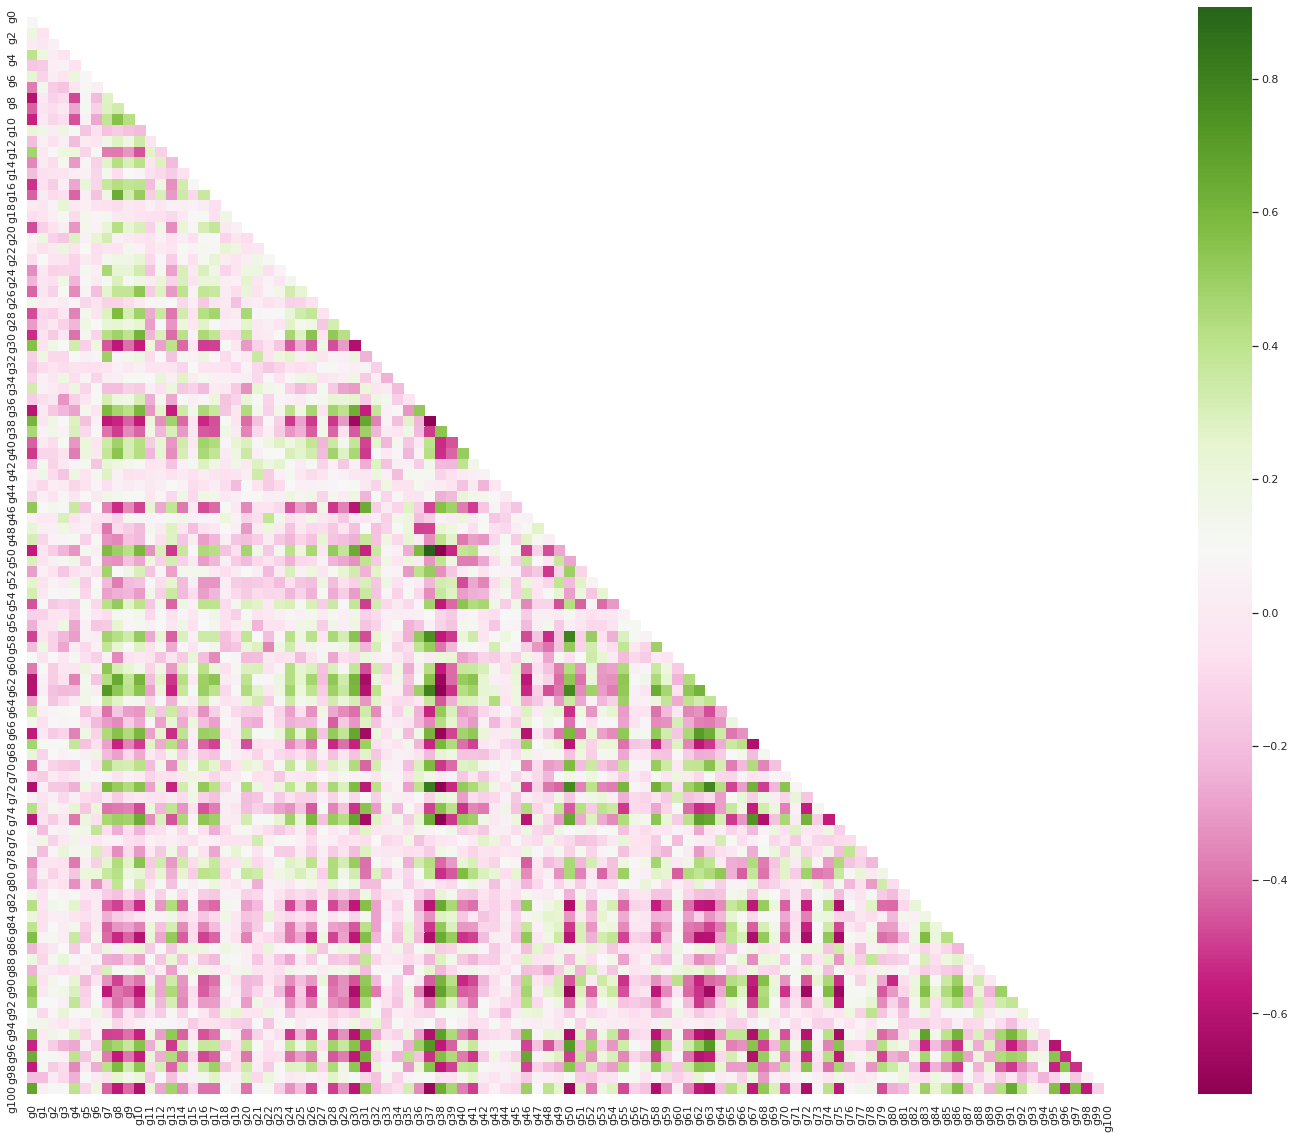

In [ ]:
mask = np.zeros_like(correlação_G)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 20))
    ax = sns.heatmap(correlação_G, mask=mask, square=True, cmap="PiYG")

- Dentro da expressão genica, observa-se que g50 e g37 possume a mais forma correlação positiva, sou seja ambos sobem ou ambos diminuem 

- Já as correlações negativas são mais presentes que as positivas 

- Ao análisar o eixo x, noa-se que entre os g37 e g41, há uma grande quantidade de correlações com as demais expressões gênicas 

De forma geral a maior parte das expressões gênicas análisadas posssuem uma correlaçãomuito fraca ou nulas (quadrados bem claros ou brancos)

In [ ]:
# correlação dentro da váriavel viabilidade celular
correlação_C = dados_editados.loc [:, 'c0':'c99'].corr()

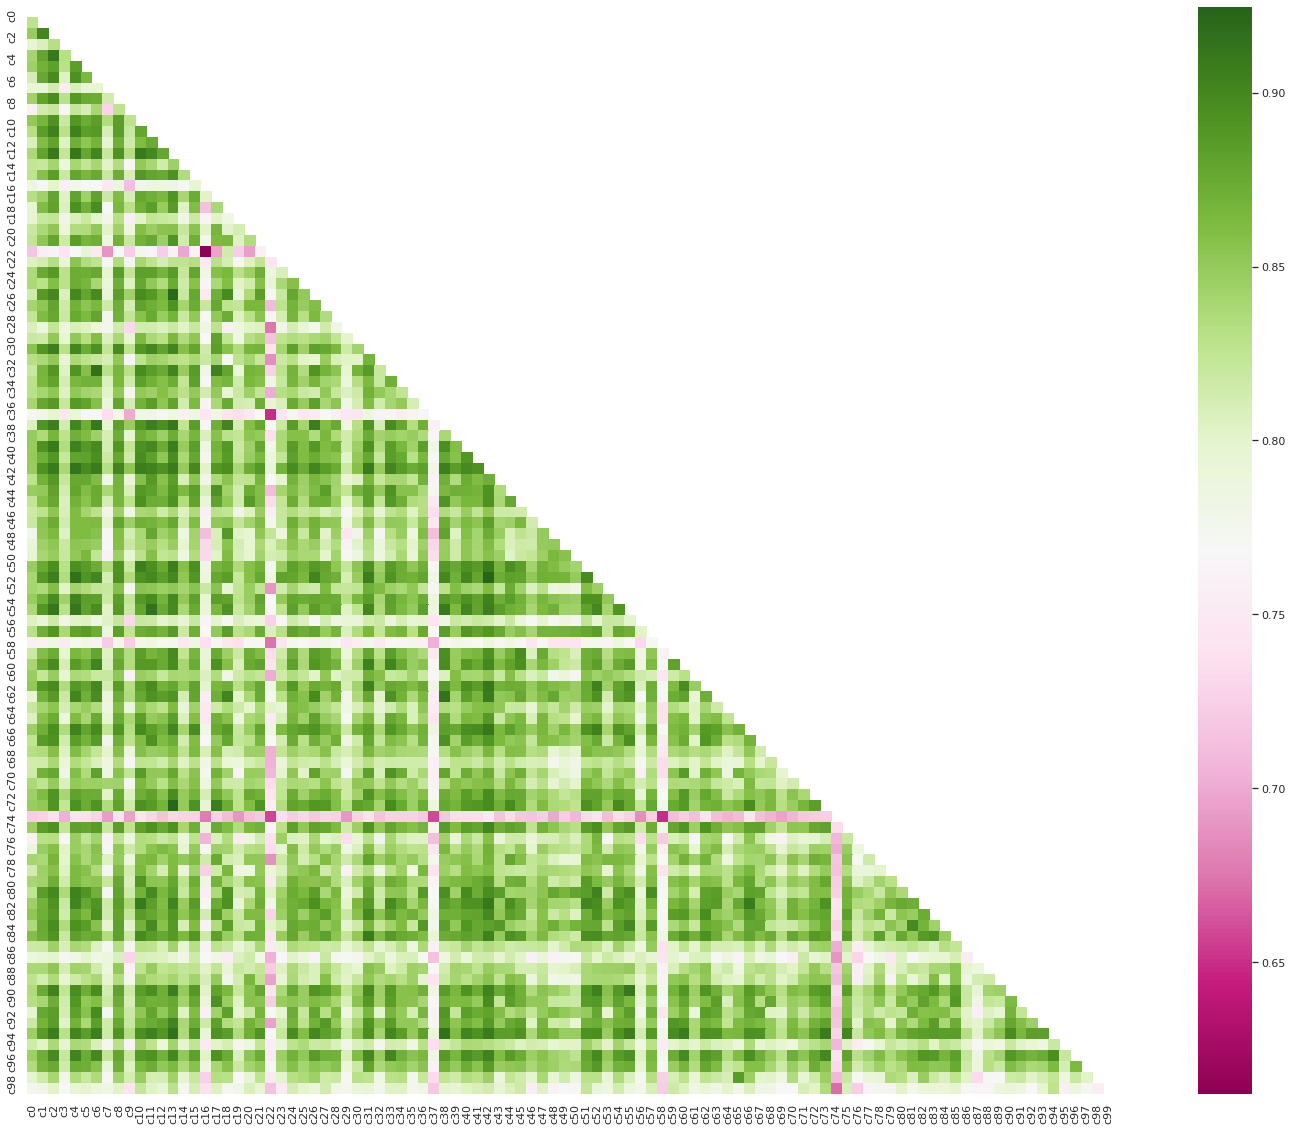

In [ ]:
mask = np.zeros_like(correlação_C)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 20))
    ax = sns.heatmap(correlação_C, mask=mask, square=True, cmap="PiYG")

Por meio da análise de correlação da viabilidade celular observa-se que quase todas as colunas possume uma correlaçõa positiva.
Sendo que as que não possume uma correlação possitiva ou não tem correlação com nenhuma outra coluna ou é negatica, como no caso da c22 e c74.
Dentre as correlações negativas a mais forte é a c16xc22

In [ ]:
# para realizar a correlação entre as as colunas G e C, primeiramente temos que isolar os dados que quermos para depois criar uma nova tabela 
# Como já vimos uma das drogas foi utilizada somente nos tratamentos de controle, então como forma de diminuir os dados e ao mesmo evitar uma colação entre os dados do control,
# vou inicialmente filtrar os dados para obter somente aqueles com_droga.

T_com_droga = dados_editados.query('tratamento == "com_droga"')
EX = T_com_droga.loc[:,'g0':'g771']
VC = T_com_droga.loc[:,'c0':'c99']

tabela_GxC = pd.concat([EX,VC], axis=1) 
tabela_GxC


g0      g1      g2      g3  ...     c96     c97     c98     c99
0      1.0620  0.5577 -0.2479 -0.6208  ... -0.3981  0.2139  0.3801  0.4176
1      0.0743  0.4087  0.2991  0.0604  ...  0.1522  0.1241  0.6077  0.7371
2      0.6280  0.5817  1.5540 -0.0764  ... -0.6417 -0.2187 -1.4080  0.6931
3     -0.5138 -0.2491 -0.2656  0.5288  ... -1.6210 -0.8784 -0.3876 -0.8154
4     -0.3254 -0.4009  0.9700  0.6919  ...  0.1094  0.2885 -0.3786  0.7125
...       ...     ...     ...     ...  ...     ...     ...     ...     ...
23808  0.1608 -1.0500  0.2551 -0.2239  ... -0.7415  0.8413 -0.4259  0.2434
23809  0.1394 -0.0636 -0.1112 -0.5080  ...  0.0631  0.9171  0.5258  0.4680
23810 -1.3260  0.3478 -0.3743  0.9905  ... -0.2084 -0.1224 -0.2715  0.3689
23812  0.6660  0.2324  0.4392  0.2044  ...  0.1732  0.7015 -0.6290  0.0740
23813 -0.8598  1.0240 -0.1361  0.7952  ... -3.5770 -0.4775 -2.1500 -4.2520

[21948 rows x 872 columns]

In [ ]:
correlação_GxC = tabela_GxC.corr()
tab_GxC = correlação_GxC.loc[:'g99','c0':] # G nas linhas e C colunas
tab_GxC 

c0        c1        c2  ...       c97       c98       c99
g0  -0.631908 -0.633972 -0.647684  ... -0.632158 -0.647554 -0.616603
g1  -0.031841 -0.023024 -0.031111  ...  0.000235  0.009191  0.012057
g2  -0.171517 -0.184193 -0.181112  ... -0.182027 -0.172717 -0.175548
g3  -0.040447 -0.098196 -0.091010  ... -0.053611 -0.084758 -0.042601
g4  -0.418163 -0.390767 -0.404131  ... -0.408512 -0.376036 -0.401475
..        ...       ...       ...  ...       ...       ...       ...
g95 -0.646563 -0.704528 -0.710063  ... -0.682136 -0.660733 -0.629801
g96  0.539435  0.626570  0.625096  ...  0.600097  0.584628  0.542355
g97 -0.688933 -0.673355 -0.686521  ... -0.670471 -0.649208 -0.626235
g98  0.556894  0.569459  0.583161  ...  0.581824  0.604920  0.555563
g99  0.181390  0.155132  0.161804  ...  0.156681  0.094653  0.157316

[100 rows x 100 columns]

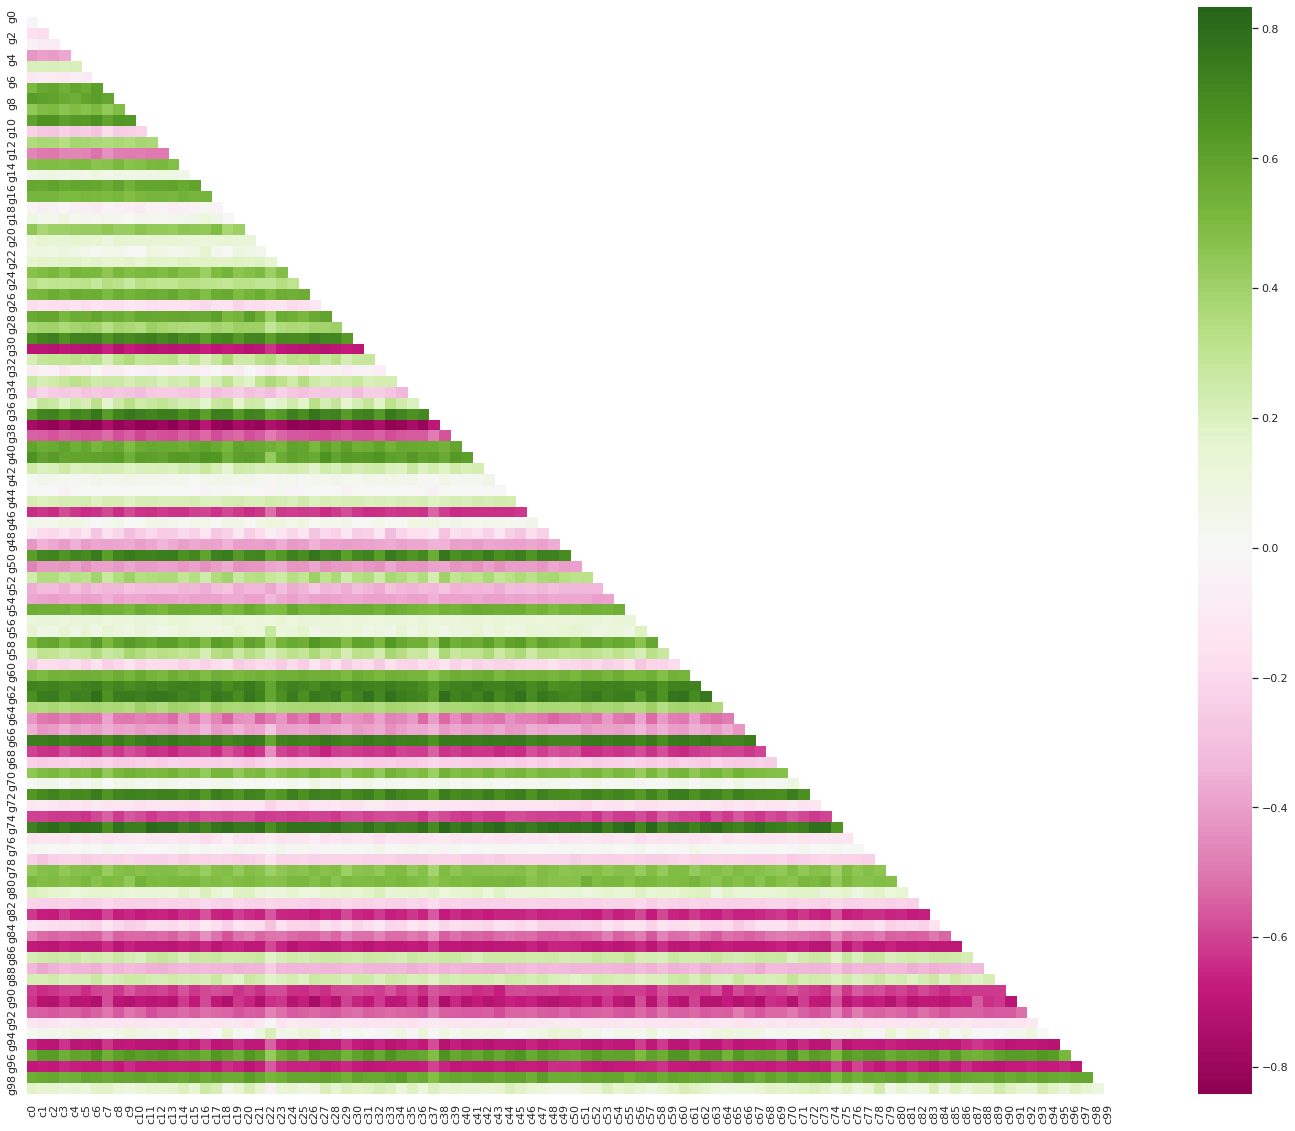

In [ ]:
mask = np.zeros_like(tab_GxC)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 20))
    ax = sns.heatmap(tab_GxC, mask=mask, square=True, cmap="PiYG")

Conseguimos observar que temos "linhas" de correlação positiva (como: g64, g74...) e 'linhas' de correlação negativa (como:g30, g38, g97...)

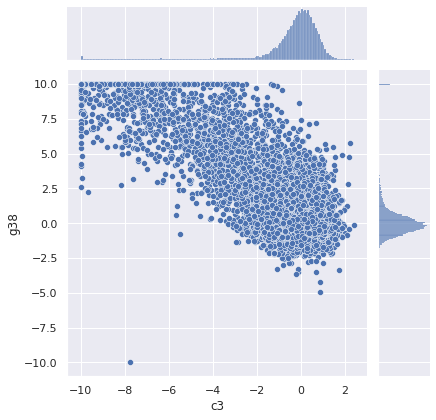

In [ ]:
sns.jointplot(x='c3', y='g38', data=dados_editados) #negativa
plt.show()


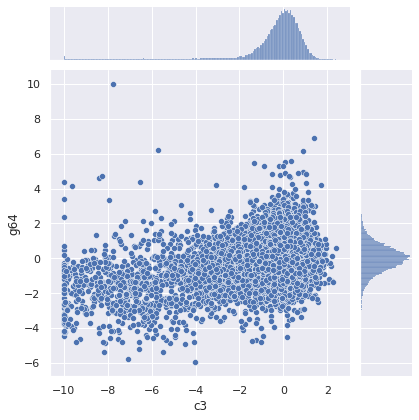

In [ ]:
sns.jointplot(x='c3', y='g64', data=dados_editados) #positiva
plt.show()

## Análise das combinações

Conseguimos observar a correlação entre os as colunas G e C, entretando esses dados estão todos misturados inda, é preciso entende como que a dosagem e o tempo estão influenciando em cada uma dessas colunas.

Por meio de um agrupamento é possivel análisar os totais para cada combinação das variáveis tempo, dose e tratamento

In [ ]:
dados_editados.groupby(by=['dose', 'tempo'])['tratamento'].value_counts()

dose  tempo  tratamento  
D1    24     com_droga       3585
             com_controle     301
      48     com_droga       4011
             com_controle     343
      72     com_droga       3600
             com_controle     307
D2    24     com_droga       3581
             com_controle     305
      48     com_droga       3591
             com_controle     305
      72     com_droga       3580
             com_controle     305
Name: tratamento, dtype: int64

Entretando, para compreender melhor a frequência dos dados quando comprado as três variáveis, foi criado uma tabela com os dados normalizados em função da dosagem.

In [ ]:
pd.crosstab([dados_editados['dose'], dados_editados['tempo']],  dados_editados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Podemos também agregar à nossa matriz uma métrica estatística, associada a uma coluna. Então para verificar a robustes dos nossos dados vamos comparar os valores de média e medida da coluna c3.

In [ ]:
pd.crosstab([dados_editados['dose'], dados_editados['tempo']], dados_editados['tratamento'], values=dados_editados['c3'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.043805  -0.252439
     48         0.078532  -0.500871
     72         0.012220  -0.723451
D2   24        -0.062676  -0.171425
     48        -0.025756  -0.371342
     72        -0.054137  -0.426914

In [ ]:
pd.crosstab( [dados_editados['dose'], dados_editados['tempo']], dados_editados['tratamento'], values=dados_editados['c3'], aggfunc='median')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           0.1024   -0.05680
     48           0.1081   -0.07170
     72           0.1528   -0.07105
D2   24          -0.0602    0.00020
     48          -0.0023   -0.05530
     72          -0.0094   -0.02845

Como é possvel observar por meio dessa análise os dados não parecem robustos

Mas para fazer essa afirmação não poderiamos estar análisando os adados misturados e sim fazer uma separação entre os tratamentos, tempos, dosagens e tipo de droga aplicada 

Como a quantidade de drogas são muitas, vamos afzer essa análise separando inicialmente os dados pelas combinações tempoXtratamento, tempoXdose e doseXtratamento.
Vamos fazer a comparação dessas combinações para as correlações que vimos antes 

- negativa: c3 com g38
- positiva : c3 com g64 

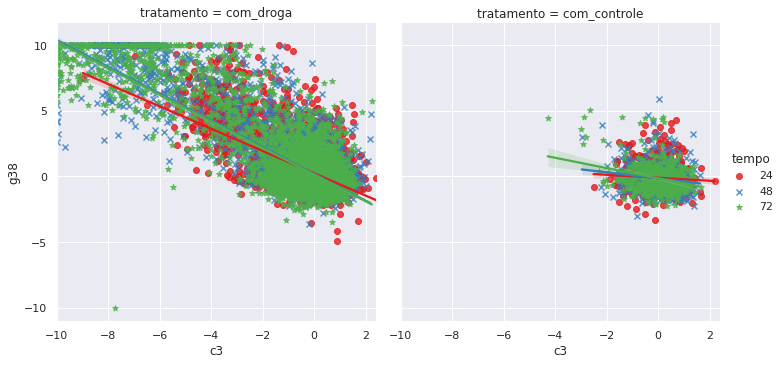

In [ ]:
# Negativa : tratamentoXtempo

sns.lmplot(x="c3",y="g38", hue="tempo", col="tratamento", palette="Set1", data=dados_editados, markers=["o", "x", "*"]);
plt.show()

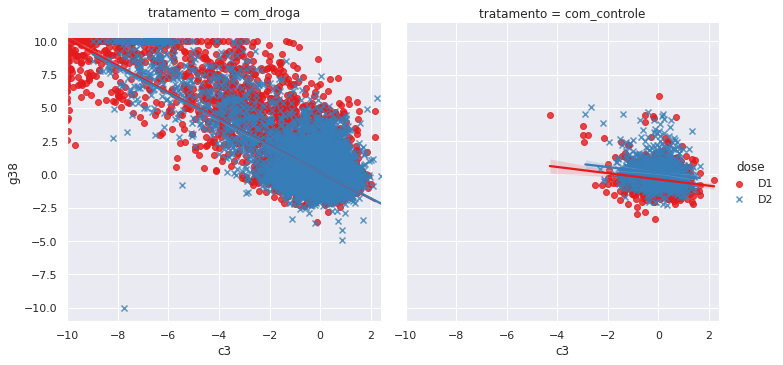

In [ ]:
# Negativa : tratamentoXdose
sns.lmplot(x="c3",y="g38", hue="dose", col="tratamento", palette="Set1", data=dados_editados, markers=["o", "x"]);
plt.show()

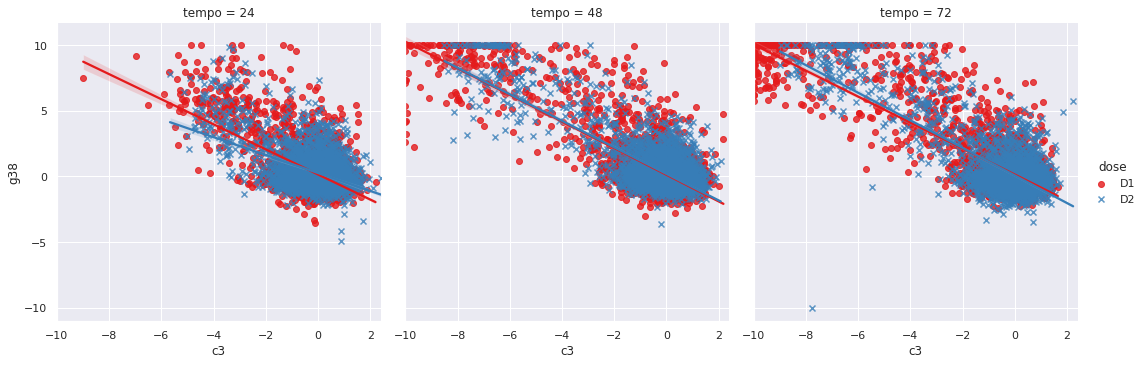

In [ ]:
# Negativa : tempoXdose
sns.lmplot(x="c3",y="g38", hue="dose", col="tempo", palette="Set1", data=dados_editados, markers=["o", "x"]);
plt.show()

- O tratamento controle não parace ser não ser afetado palo tempo ou dosagem 
- Independente do tempo ou da dosagem o dados apresentam uma tendencia de queda de valores, sendo a maior concetração de resultados perto do zero 
- O tempo de 24h os dados estão mais concentrados perto de 0 que os demais tempos, em especial para D2

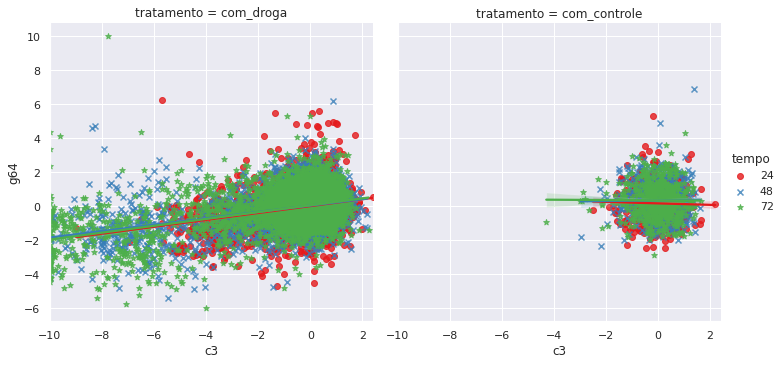

In [ ]:
# Positiva : tratamentoXtempo
sns.lmplot(x="c3",y="g64", hue="tempo", col="tratamento", palette="Set1", data=dados_editados, markers=["o", "x", "*"]);
plt.show()

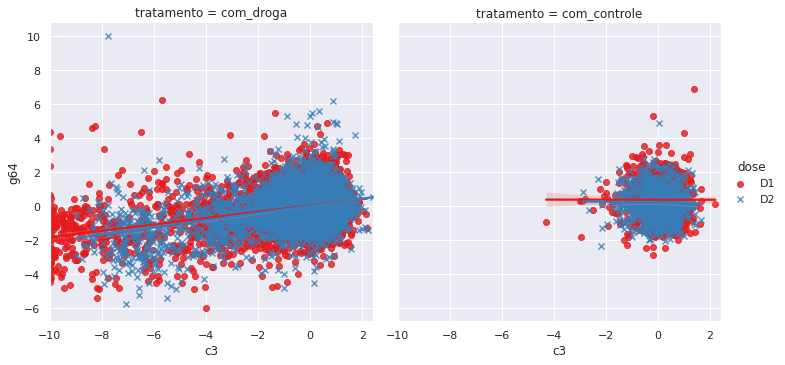

In [ ]:
# Positiva : tratamentoXdose
sns.lmplot(x="c3",y="g64", hue="dose", col="tratamento", palette="Set1", data=dados_editados, markers=["o", "x"]);
plt.show()

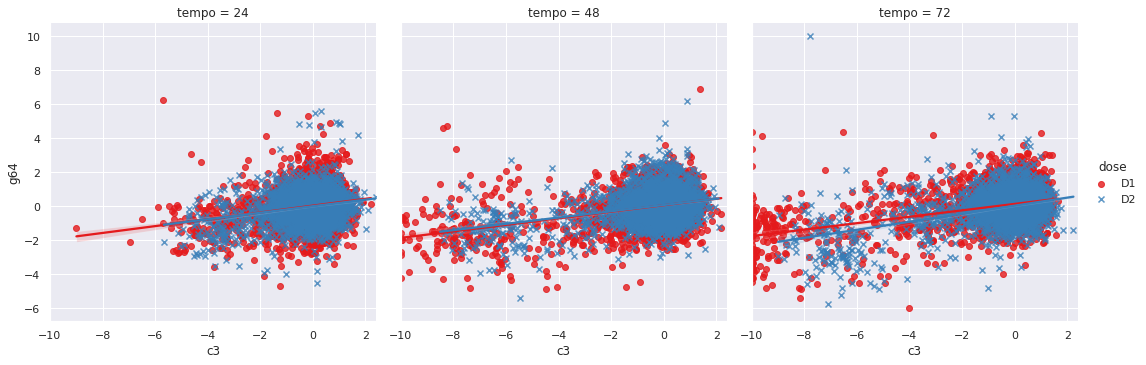

In [ ]:
# Positiva : tempoXdose

sns.lmplot(x="c3",y="g64", hue="dose", col="tempo", palette="Set1", data=dados_editados, markers=["o", "x"]);
plt.show()

- Novamente o tratamento controle não parace ser não ser afetado palo tempo ou dosagem
- Independente do tempo ou da dosagem o dados apresentam uma tendencia de ascensão de valores, sendo a maior concetração de resultados perto do zero. Entretanto dferentemente da correlação negativa, intensidade da ascensão foi menor que da queda 
- O tempo de 24h os dados estão mais concentrados perto de 0 que os demais tempos, em especial para D2

Atráves dessas pequenas análises podemos ter algumas informações sobre o comportamento dos nossos dados, mais duas coisas muito importantes ainda não foram análisadas:

1.   A comparação entre os resultados dos tratmento com_controle e com_droga para cada coluna de G e C, individualmente
2.  A comparação entre cada um dos compostos e o que cada uma delas causou

## Comparação entre os tratamentos para cada coluna de G e C

Para fazer essa comparação é possível criara uma tabela dinâmica para podermos comprar os tratamento e ver se cada se  houve alguma diferença entre  ele  para cada uma das colunas individualmente.
Para isso vou fazer uma comparação entre aa média e a mediana novamente, a fim de verificar a robustes dos dados. 

In [ ]:
T_media = pd.pivot_table(dados_editados, index='tratamento', aggfunc='mean')
T_media

c0        c1       c10  ...       g98       g99      tempo
tratamento                                  ...                               
com_controle  0.127822  0.194264  0.241917  ...  0.174032  0.037182  48.077170
com_droga    -0.396219 -0.510589 -0.547917  ... -0.296023 -0.032029  48.015309

[2 rows x 873 columns]

In [ ]:
T_mediana = pd.pivot_table(dados_editados, index='tratamento', aggfunc='median')
T_mediana

c0       c1      c10  ...      g98      g99  tempo
tratamento                               ...                         
com_controle  0.17035  0.23775  0.28425  ...  0.18525  0.05835     48
com_droga    -0.02700 -0.01230 -0.02190  ...  0.01630 -0.01075     48

[2 rows x 873 columns]

Através dessas tabelas é possivel observar que:
- Muitas vezes a viabilidade celular diminuiu 
- A expressão gênica foi variado, algumas aumentárame outras diminuiram

Porém ainda não está claro o porque isso ocorreu e nem qual droga gerou esses resultados

In [ ]:
T_composto = pd.pivot_table(dados_editados, index='composto', aggfunc='median')
T_composto

c0       c1      c10      c11  ...      g97      g98      g99  tempo
composto                                       ...                                  
00199ff52 -0.34605  0.15420 -0.20515 -0.12960  ... -0.71885  0.36500 -0.32400     48
00251fc41 -0.37950 -0.15780  0.24190  0.17755  ...  0.16335  0.06990  0.15215     48
00321ea80  0.30865 -0.08600  0.28490  0.13085  ...  0.20095  0.43965 -0.19465     48
0034c0847 -0.42525 -0.04025 -1.07900  0.12640  ... -0.14970  0.35600 -0.01815     48
0060e686f  0.43395 -0.21230  0.18005 -0.18840  ...  0.07545 -0.38000  0.56335     48
...            ...      ...      ...      ...  ...      ...      ...      ...    ...
ff9565933 -0.49250 -1.31430  0.01255 -0.46200  ... -0.49420  0.28675  0.08855     48
ffd66e220  0.05720 -0.50130 -0.08565 -0.37305  ... -0.51480 -0.26425 -0.05495     48
ffe357f8f  0.14910 -0.10660  0.69470  0.14390  ... -0.05800 -1.23600  0.47360     48
ffed8e1c9 -0.22685  0.42300 -0.03515 -0.37435  ...  0.39415  0.30885 -0.14550     48
fff7d208d  0.66740  0.11365  0.65035  0.80840  ...  0.31325 -0.18320 -0.14680     48

[3289 rows x 873 columns]

Agora é possivel verificar para cada composto o que aconteceu tanto com as expressoes gênicas quanto para a vianilidade celular.

Vamos fazer uma análise rápida da coluna c0, sabendo que o valor do com_controle = 0.17035 ( sempre com base nos valores médios obtidos)

A forma correta de se analisar, comparar a verificar a viabilidade da celular que que está utilizando droga e com tratamento controle. Se o valor de "c0" que recebeu alguma droga for menor do que o "c0" do controle, pode nos indicar que menos células sobreviveram

- 00199ff52 => -0.34605  - menos células sobreviveram
- 00251fc41 => -0.37950  - menos células sobreviveram
- ff9565933 => -0.49250  - menos células sobreviveram
- fff7d208d => 0.66740   - mais células 

Mas vale resaltar que aqui  não estamos vericando separadamente as doses e nem os tempos de exposição

#  CONHECENDO OS DADOS - Tabela resultados 

Agora vamos análisar os dados da tabela resultados 

Fonte dos dados: https://github.com/sdmuzel/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true

In [ ]:
dados_resultados = pd.read_csv('https://github.com/sdmuzel/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')
dados_resultados.head()

id  ...  wnt_inhibitor
0  id_000644bb2  ...              0
1  id_000779bfc  ...              0
2  id_000a6266a  ...              0
3  id_0015fd391  ...              0
4  id_001626bd3  ...              0

[5 rows x 207 columns]

In [ ]:
# vamos verificar o formato (shape) dos dados 
dados_resultados.shape

(23814, 207)

In [ ]:
dados_resultados.columns.values

array(['id', '5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist',
       'acetylcholinesterase_inhibitor', 'adenosine_receptor_agonist',
       'adenosine_receptor_antagonist', 'adenylyl_cyclase_activator',
       'adrenergic_receptor_agonist', 'adrenergic_receptor_antagonist',
       'akt_inhibitor', 'aldehyde_dehydrogenase_inhibitor',
       'alk_inhibitor', 'ampk_activator', 'analgesic',
       'androgen_receptor_agonist', 'androgen_receptor_antagonist',
       'anesthetic_-_local', 'angiogenesis_inhibitor',
       'angiotensin_receptor_antagonist', 'anti-inflammatory',
       'antiarrhythmic', 'antibiotic', 'anticonvulsant', 'antifungal',
       'antihistamine', 'antimalarial', 'antioxidant', 'antiprotozoal',
       'antiviral', 'apoptosis_stimulant', 'aromatase_inhibitor',
       'atm_kinase_inhibitor',
       'atp-sensitive_potassium_channel_antagonist',
       'atp_synthase

In [ ]:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [ ]:
dados_resultados.dtypes

id                                       object
5-alpha_reductase_inhibitor               int64
11-beta-hsd1_inhibitor                    int64
acat_inhibitor                            int64
acetylcholine_receptor_agonist            int64
                                          ...  
ubiquitin_specific_protease_inhibitor     int64
vegfr_inhibitor                           int64
vitamin_b                                 int64
vitamin_d_receptor_agonist                int64
wnt_inhibitor                             int64
Length: 207, dtype: object

Agora já compreendemos melhor os nossos dados.
Sabemos que a nossa tabela de reultados possui 23814 linhas, assim como a tabela de experimentos e 207 colunas. Sendo que a coluna ID é um objeto, além de que é a mesma que temos na tabela experimentos ( que poderemos ter como nossa chave primária) e as demais colunas são do tipo numérico-inteiro. 



## CONHECENDO AS COLUNAS

Vemos que temos muitos zeros, nas colunas e como ela são numéricas inteiras, isso pode indicar que  sejão 0 ou 1, para ter certza disso vamos pegar 3 colunas aleatórias e verificar se realmente isso está certo

In [ ]:
dados_resultados['egfr_inhibitor'].unique()

array([0, 1])

In [ ]:
dados_resultados['chelating_agent'].unique()

array([0, 1])

In [ ]:
dados_resultados['laxative'].unique()

array([0, 1])

Parace que estamos indo pelo caminho certo.
Mas vemos que temos varios tipos de açoes, como 
inhibitor e receptor_antagonist 
Então vamos ver quais são as açoes que temos utilizando o comando split(). Em seu parâmetro passamos qual o tipo de caracter que desejamos dividir as strings, no caso usaremos o "-".

E depois vamos criar uma nova tabela com esses dados

In [ ]:
T_ação = [cont.split('_')[-1] for cont in dados_resultados]
T_ação

['id',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'agonist',
 'antagonist',
 'inhibitor',
 'agonist',
 'antagonist',
 'activator',
 'agonist',
 'antagonist',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'activator',
 'analgesic',
 'agonist',
 'antagonist',
 'local',
 'inhibitor',
 'antagonist',
 'anti-inflammatory',
 'antiarrhythmic',
 'antibiotic',
 'anticonvulsant',
 'antifungal',
 'antihistamine',
 'antimalarial',
 'antioxidant',
 'antiprotozoal',
 'antiviral',
 'stimulant',
 'inhibitor',
 'inhibitor',
 'antagonist',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'antifolate',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'agonist',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'blocker',
 'agonist',
 'antagonist',
 'inhibitor',
 'inhibitor',
 'activator',
 'inhibitor',
 'antagonist',
 'antagonist',
 'inhibitor',
 'agent',
 'inhibitor',
 'blocker',
 'inhibitor',
 'antagonist',
 'inhib

In [ ]:
# contando  número de vezes qua cada ação ocorreu
from collections import Counter
contador_ação = Counter(T_ação)
contador_ação


Counter({'activator': 5,
         'agent': 3,
         'agonist': 28,
         'analgesic': 1,
         'antagonist': 32,
         'anti-inflammatory': 1,
         'antiarrhythmic': 1,
         'antibiotic': 1,
         'anticonvulsant': 1,
         'antifolate': 1,
         'antifungal': 1,
         'antihistamine': 1,
         'antimalarial': 1,
         'antioxidant': 1,
         'antiprotozoal': 1,
         'antiviral': 1,
         'b': 1,
         'blocker': 2,
         'diuretic': 1,
         'donor': 1,
         'id': 1,
         'immunosuppressant': 1,
         'inhibitor': 112,
         'laxative': 1,
         'local': 1,
         'medium': 1,
         'scavenger': 1,
         'secretagogue': 1,
         'sensitizer': 1,
         'steroid': 1,
         'stimulant': 1})

In [ ]:
# pondo na ordem  descrecente - posso usar o pandas.Series.value_counts
total_ação = pd.Series(T_ação).value_counts()
total_ação

inhibitor            112
antagonist            32
agonist               28
activator              5
agent                  3
blocker                2
secretagogue           1
antibiotic             1
antimalarial           1
antifolate             1
donor                  1
antiviral              1
antifungal             1
anticonvulsant         1
laxative               1
b                      1
immunosuppressant      1
diuretic               1
analgesic              1
antihistamine          1
antiprotozoal          1
local                  1
steroid                1
stimulant              1
id                     1
antiarrhythmic         1
medium                 1
sensitizer             1
anti-inflammatory      1
scavenger              1
antioxidant            1
dtype: int64

Ótimo, agota já sabemos que as ações que mais ocorreram são 

- inhibitor   =>  112
- antagonist  =>  32
- agonist     =>  28

Agora precisamos fazer uma ligação entre as ações ocorridas e os compostos utilizados

In [ ]:
#criando a coluna total_moa onde vamos identificar quantas ações aquele experimento ativou
dados_resultados['total_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados

id  5-alpha_reductase_inhibitor  ...  wnt_inhibitor  total_moa
0      id_000644bb2                            0  ...              0          1
1      id_000779bfc                            0  ...              0          0
2      id_000a6266a                            0  ...              0          3
3      id_0015fd391                            0  ...              0          0
4      id_001626bd3                            0  ...              0          1
...             ...                          ...  ...            ...        ...
23809  id_fffb1ceed                            0  ...              0          1
23810  id_fffb70c0c                            0  ...              0          1
23811  id_fffc1c3f4                            0  ...              0          0
23812  id_fffcb9e7c                            0  ...              0          1
23813  id_ffffdd77b                            0  ...              0          0

[23814 rows x 208 columns]

In [ ]:
# Criando a coluna moa_ativo onde vamos identificar se alguma ação foi ativada ou não
dados_resultados['moa_ativo'] = (dados_resultados['total_moa'] != 0)
dados_resultados

id  5-alpha_reductase_inhibitor  ...  total_moa  moa_ativo
0      id_000644bb2                            0  ...          1       True
1      id_000779bfc                            0  ...          0      False
2      id_000a6266a                            0  ...          3       True
3      id_0015fd391                            0  ...          0      False
4      id_001626bd3                            0  ...          1       True
...             ...                          ...  ...        ...        ...
23809  id_fffb1ceed                            0  ...          1       True
23810  id_fffb70c0c                            0  ...          1       True
23811  id_fffc1c3f4                            0  ...          0      False
23812  id_fffcb9e7c                            0  ...          1       True
23813  id_ffffdd77b                            0  ...          0      False

[23814 rows x 209 columns]

In [ ]:
# juntando as tabelas com dados experimentais  com  a tabela de resultados já com a novas colunas 
todos_os_dados = pd.merge(dados_editados, dados_resultados, on ='id')
todos_os_dados.head()

id tratamento  tempo  ... wnt_inhibitor total_moa  moa_ativo
0  id_000644bb2  com_droga     24  ...             0         1       True
1  id_000779bfc  com_droga     72  ...             0         0      False
2  id_000a6266a  com_droga     48  ...             0         3       True
3  id_0015fd391  com_droga     48  ...             0         0      False
4  id_001626bd3  com_droga     72  ...             0         1       True

[5 rows x 1085 columns]

In [ ]:
# criando uma tabela extra só com algumas informações dos resultados
dados_combinados = pd.merge(dados_editados, dados_resultados[['id', 'total_moa', 'moa_ativo']], on ='id')
dados_combinados.head()


id tratamento  tempo dose  ...     c98     c99  total_moa  moa_ativo
0  id_000644bb2  com_droga     24   D1  ...  0.3801  0.4176          1       True
1  id_000779bfc  com_droga     72   D1  ...  0.6077  0.7371          0      False
2  id_000a6266a  com_droga     48   D1  ... -1.4080  0.6931          3       True
3  id_0015fd391  com_droga     48   D1  ... -0.3876 -0.8154          0      False
4  id_001626bd3  com_droga     72   D2  ... -0.3786  0.7125          1       True

[5 rows x 879 columns]

In [ ]:
# Criando uma coluna para ver o tramento foi controle ou com droga
dados_combinados['eh_controle'] = (dados_combinados['tratamento'] == 'com_controle')
dados_combinados

id    tratamento  tempo  ... total_moa moa_ativo  eh_controle
0      id_000644bb2     com_droga     24  ...         1      True        False
1      id_000779bfc     com_droga     72  ...         0     False        False
2      id_000a6266a     com_droga     48  ...         3      True        False
3      id_0015fd391     com_droga     48  ...         0     False        False
4      id_001626bd3     com_droga     72  ...         1      True        False
...             ...           ...    ...  ...       ...       ...          ...
23809  id_fffb1ceed     com_droga     24  ...         1      True        False
23810  id_fffb70c0c     com_droga     24  ...         1      True        False
23811  id_fffc1c3f4  com_controle     48  ...         0     False         True
23812  id_fffcb9e7c     com_droga     24  ...         1      True        False
23813  id_ffffdd77b     com_droga     72  ...         0     False        False

[23814 rows x 880 columns]

In [ ]:
# criando coluna para verificar qual o periodo que o experimeto foi exposto
dados_combinados['24h'] = (dados_combinados['tempo'] == 24)
dados_combinados['48h'] = (dados_combinados['tempo'] == 48)
dados_combinados['72h'] = (dados_combinados['tempo'] == 72)
dados_combinados

id    tratamento  tempo dose  ... eh_controle    24h    48h    72h
0      id_000644bb2     com_droga     24   D1  ...       False   True  False  False
1      id_000779bfc     com_droga     72   D1  ...       False  False  False   True
2      id_000a6266a     com_droga     48   D1  ...       False  False   True  False
3      id_0015fd391     com_droga     48   D1  ...       False  False   True  False
4      id_001626bd3     com_droga     72   D2  ...       False  False  False   True
...             ...           ...    ...  ...  ...         ...    ...    ...    ...
23809  id_fffb1ceed     com_droga     24   D2  ...       False   True  False  False
23810  id_fffb70c0c     com_droga     24   D2  ...       False   True  False  False
23811  id_fffc1c3f4  com_controle     48   D2  ...        True  False   True  False
23812  id_fffcb9e7c     com_droga     24   D1  ...       False   True  False  False
23813  id_ffffdd77b     com_droga     72   D1  ...       False  False  False   True

[23814 rows x 883 columns]

In [ ]:
dados_combinados['D1'] = (dados_combinados['dose'] == 'D1')
dados_combinados['D2'] = (dados_combinados['dose'] == 'D2')
dados_combinados

id    tratamento  tempo dose  ...    48h    72h     D1     D2
0      id_000644bb2     com_droga     24   D1  ...  False  False   True  False
1      id_000779bfc     com_droga     72   D1  ...  False   True   True  False
2      id_000a6266a     com_droga     48   D1  ...   True  False   True  False
3      id_0015fd391     com_droga     48   D1  ...   True  False   True  False
4      id_001626bd3     com_droga     72   D2  ...  False   True  False   True
...             ...           ...    ...  ...  ...    ...    ...    ...    ...
23809  id_fffb1ceed     com_droga     24   D2  ...  False  False  False   True
23810  id_fffb70c0c     com_droga     24   D2  ...  False  False  False   True
23811  id_fffc1c3f4  com_controle     48   D2  ...   True  False  False   True
23812  id_fffcb9e7c     com_droga     24   D1  ...  False  False   True  False
23813  id_ffffdd77b     com_droga     72   D1  ...  False   True   True  False

[23814 rows x 885 columns]

Agora podems fazer uma análise mais detalhada considerando tempo e dose, para comparar as distribuições.

Vamos verificar os compostos: 

- 00199ff5
- 00251fc41
- ff9565933
- fff7d208d 



In [ ]:
dados_combinados.query('composto == "00199ff5" & moa_ativo == True')

Empty DataFrame
Columns: [id, tratamento, tempo, dose, composto, g0, g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12, g13, g14, g15, g16, g17, g18, g19, g20, g21, g22, g23, g24, g25, g26, g27, g28, g29, g30, g31, g32, g33, g34, g35, g36, g37, g38, g39, g40, g41, g42, g43, g44, g45, g46, g47, g48, g49, g50, g51, g52, g53, g54, g55, g56, g57, g58, g59, g60, g61, g62, g63, g64, g65, g66, g67, g68, g69, g70, g71, g72, g73, g74, g75, g76, g77, g78, g79, g80, g81, g82, g83, g84, g85, g86, g87, g88, g89, g90, g91, g92, g93, g94, ...]
Index: []

[0 rows x 885 columns]

O composto 00199ff5 não ativou nenhuma ação

In [ ]:
dados_combinados.query('composto == "00251fc41" & moa_ativo == True')

id tratamento  tempo dose  ...    48h    72h     D1     D2
1313   id_0dabbae4a  com_droga     24   D1  ...  False  False   True  False
5167   id_37872182f  com_droga     48   D2  ...   True  False  False   True
8904   id_5ff35901c  com_droga     72   D2  ...  False   True  False   True
12671  id_888d023b5  com_droga     72   D1  ...  False   True   True  False
18327  id_c4aea7f07  com_droga     48   D1  ...   True  False   True  False
21560  id_e7290a9ed  com_droga     24   D2  ...  False  False  False   True

[6 rows x 885 columns]

o composto 00251fc41 foi utilizado 6 vezes e em cada um desses experimentos ativou 3 ações, sendo que desses 6, 2 foi com 24h, 2 com 48h e 2 com 72h, e 3 deles foi com adose d1 e 3 com D2.

In [ ]:
dados_combinados.query('composto == "ff9565933" & moa_ativo == True') 

id tratamento  tempo dose  ...    48h    72h     D1     D2
191    id_02113de68  com_droga     24   D1  ...  False  False   True  False
6460   id_454a6f940  com_droga     72   D1  ...  False   True   True  False
13336  id_8fb178f08  com_droga     24   D2  ...  False  False  False   True
14462  id_9bb1d3da5  com_droga     48   D2  ...   True  False  False   True
18410  id_c5988f495  com_droga     72   D2  ...  False   True  False   True
19611  id_d2864c966  com_droga     48   D1  ...   True  False   True  False

[6 rows x 885 columns]

o composto ff9565933 foi utilizado 6 vezes e em cada um desses experimentos ativou 1 ação, sendo que desses 6, 2 foi com 24h, 2 com 48h e 2 com 72h, e 3 deles foi com adose d1 e 3 com D2.

ff9565933

In [ ]:
dados_combinados.query('composto == "fff7d208d" & moa_ativo == True') 

Empty DataFrame
Columns: [id, tratamento, tempo, dose, composto, g0, g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12, g13, g14, g15, g16, g17, g18, g19, g20, g21, g22, g23, g24, g25, g26, g27, g28, g29, g30, g31, g32, g33, g34, g35, g36, g37, g38, g39, g40, g41, g42, g43, g44, g45, g46, g47, g48, g49, g50, g51, g52, g53, g54, g55, g56, g57, g58, g59, g60, g61, g62, g63, g64, g65, g66, g67, g68, g69, g70, g71, g72, g73, g74, g75, g76, g77, g78, g79, g80, g81, g82, g83, g84, g85, g86, g87, g88, g89, g90, g91, g92, g93, g94, ...]
Index: []

[0 rows x 885 columns]

O composto fff7d208d não ativou nenhuma ação

Nessa nossa pequena invertigação vimos que dois compostos não ativaram nenhuma ação, então pensando em falicitar a nossa análise podemos crira uma tabala onde só contenha os experimentos que ativaram alguma ação

### Experimentos ativados

In [ ]:
ativados= dados_combinados.query(' moa_ativo == True') 
ativados

id tratamento  tempo dose  ...    48h    72h     D1     D2
0      id_000644bb2  com_droga     24   D1  ...  False  False   True  False
2      id_000a6266a  com_droga     48   D1  ...   True  False   True  False
4      id_001626bd3  com_droga     72   D2  ...  False   True  False   True
5      id_001762a82  com_droga     24   D1  ...  False  False   True  False
7      id_0020d0484  com_droga     48   D1  ...   True  False   True  False
...             ...        ...    ...  ...  ...    ...    ...    ...    ...
23807  id_fff7e6992  com_droga     48   D1  ...   True  False   True  False
23808  id_fff8c2444  com_droga     72   D1  ...  False   True   True  False
23809  id_fffb1ceed  com_droga     24   D2  ...  False  False  False   True
23810  id_fffb70c0c  com_droga     24   D2  ...  False  False  False   True
23812  id_fffcb9e7c  com_droga     24   D1  ...  False  False   True  False

[14447 rows x 885 columns]

Agora sabemos que somente 14447 experimentos ativaram alguma ação. Se quisermos podemos ainda dividir isso em quantos experimentos ativaram um certo número de ações, 1, 2 , 3....

In [ ]:
# quantos experimentos ativaram somente 1 ação

ativados.query('total_moa == 1') 

id tratamento  tempo dose  ...    48h    72h     D1     D2
0      id_000644bb2  com_droga     24   D1  ...  False  False   True  False
4      id_001626bd3  com_droga     72   D2  ...  False   True  False   True
5      id_001762a82  com_droga     24   D1  ...  False  False   True  False
7      id_0020d0484  com_droga     48   D1  ...   True  False   True  False
9      id_0023f063e  com_droga     48   D2  ...   True  False  False   True
...             ...        ...    ...  ...  ...    ...    ...    ...    ...
23807  id_fff7e6992  com_droga     48   D1  ...   True  False   True  False
23808  id_fff8c2444  com_droga     72   D1  ...  False   True   True  False
23809  id_fffb1ceed  com_droga     24   D2  ...  False  False  False   True
23810  id_fffb70c0c  com_droga     24   D2  ...  False  False  False   True
23812  id_fffcb9e7c  com_droga     24   D1  ...  False  False   True  False

[12532 rows x 885 columns]

In [ ]:
# quantos experimentos ativaram somente 2 ações

ativados.query('total_moa == 2') 

id tratamento  tempo dose  ...    48h    72h     D1     D2
11     id_0024bcd70  com_droga     48   D2  ...   True  False  False   True
16     id_002fb9c19  com_droga     48   D1  ...   True  False   True  False
21     id_003b43239  com_droga     48   D1  ...   True  False   True  False
26     id_00548fd5c  com_droga     72   D1  ...  False   True   True  False
64     id_009da9c07  com_droga     24   D1  ...  False  False   True  False
...             ...        ...    ...  ...  ...    ...    ...    ...    ...
23727  id_ff1d43f96  com_droga     24   D2  ...  False  False  False   True
23732  id_ff24fc052  com_droga     72   D2  ...  False   True  False   True
23776  id_ff9d0a022  com_droga     24   D2  ...  False  False  False   True
23791  id_ffd1fd119  com_droga     72   D2  ...  False   True  False   True
23802  id_fff3976bd  com_droga     24   D1  ...  False  False   True  False

[1538 rows x 885 columns]

In [ ]:
# quantos experimentos ativaram somente 3 ações

ativados.query('total_moa == 3') 

id tratamento  tempo dose  ...    48h    72h     D1     D2
2      id_000a6266a  com_droga     48   D1  ...   True  False   True  False
57     id_0093bf6b8  com_droga     24   D1  ...  False  False   True  False
178    id_01f476574  com_droga     24   D1  ...  False  False   True  False
409    id_045985616  com_droga     72   D2  ...  False   True  False   True
474    id_050711b03  com_droga     48   D2  ...   True  False  False   True
...             ...        ...    ...  ...  ...    ...    ...    ...    ...
23295  id_fa574d5b8  com_droga     48   D1  ...   True  False   True  False
23313  id_fa79b46c7  com_droga     48   D2  ...   True  False  False   True
23421  id_fbc048a2a  com_droga     24   D2  ...  False  False  False   True
23504  id_fcaa76b28  com_droga     48   D1  ...   True  False   True  False
23660  id_fe410657d  com_droga     72   D1  ...  False   True   True  False

[303 rows x 885 columns]

In [ ]:
# quantos experimentos ativaram somente 4 ações

ativados.query('total_moa == 4') 

id tratamento  tempo dose  ...    48h    72h     D1     D2
18     id_003603254  com_droga     72   D2  ...  False   True  False   True
605    id_063e8e7d6  com_droga     24   D1  ...  False  False   True  False
2071   id_163bd7f3e  com_droga     72   D1  ...  False   True   True  False
4363   id_2ee4275d6  com_droga     72   D2  ...  False   True  False   True
4528   id_30bb494fa  com_droga     24   D2  ...  False  False  False   True
4704   id_32a31c8ca  com_droga     24   D2  ...  False  False  False   True
4956   id_3553c695e  com_droga     72   D2  ...  False   True  False   True
5462   id_3adb2a455  com_droga     48   D1  ...   True  False   True  False
5594   id_3c3326adb  com_droga     72   D2  ...  False   True  False   True
6028   id_40e204e3f  com_droga     24   D2  ...  False  False  False   True
6375   id_447604cdb  com_droga     24   D2  ...  False  False  False   True
7050   id_4ba581c3c  com_droga     24   D1  ...  False  False   True  False
7490   id_505e89f6e  com_droga     24   D2  ...  False  False  False   True
7770   id_53395e954  com_droga     72   D1  ...  False   True   True  False
8130   id_572229646  com_droga     48   D1  ...   True  False   True  False
8640   id_5d2717c73  com_droga     72   D1  ...  False   True   True  False
8754   id_5e57b0363  com_droga     24   D1  ...  False  False   True  False
9510   id_66809bd53  com_droga     48   D2  ...   True  False  False   True
9813   id_69a1c7503  com_droga     48   D2  ...   True  False  False   True
10032  id_6c233e839  com_droga     48   D2  ...   True  False  False   True
11109  id_775b00aee  com_droga     72   D2  ...  False   True  False   True
11377  id_7a60d0e0a  com_droga     72   D1  ...  False   True   True  False
11550  id_7c8282abe  com_droga     24   D2  ...  False  False  False   True
13006  id_8bfd828b0  com_droga     72   D2  ...  False   True  False   True
13048  id_8c91d4929  com_droga     48   D2  ...   True  False  False   True
13168  id_8dcf9930e  com_droga     72   D2  ...  False   True  False   True
13326  id_8f91035eb  com_droga     48   D2  ...   True  False  False   True
13571  id_923f0b19d  com_droga     24   D1  ...  False  False   True  False
13808  id_94f30ae53  com_droga     48   D2  ...   True  False  False   True
14142  id_9858558c2  com_droga     48   D2  ...   True  False  False   True
15000  id_a146a4e76  com_droga     48   D2  ...   True  False  False   True
15296  id_a4791aab0  com_droga     24   D2  ...  False  False  False   True
15327  id_a4e24d5f9  com_droga     72   D1  ...  False   True   True  False
15468  id_a693f0299  com_droga     72   D2  ...  False   True  False   True
15787  id_a9b36f4dc  com_droga     24   D2  ...  False  False  False   True
16522  id_b19b1f6ac  com_droga     24   D1  ...  False  False   True  False
16904  id_b5e037a70  com_droga     72   D1  ...  False   True   True  False
17712  id_be3b8800b  com_droga     48   D1  ...   True  False   True  False
19092  id_ccf045c4d  com_droga     72   D2  ...  False   True  False   True
19169  id_cdb535dbc  com_droga     48   D1  ...   True  False   True  False
19601  id_d2677784a  com_droga     48   D2  ...   True  False  False   True
19815  id_d490c495c  com_droga     48   D1  ...   True  False   True  False
19854  id_d502072c4  com_droga     48   D1  ...   True  False   True  False
19931  id_d5be31bcf  com_droga     72   D1  ...  False   True   True  False
20191  id_d8c52788b  com_droga     24   D1  ...  False  False   True  False
20576  id_dcdcbc941  com_droga     72   D1  ...  False   True   True  False
20756  id_de917322d  com_droga     48   D1  ...   True  False   True  False
20823  id_df3a1adcc  com_droga     24   D2  ...  False  False  False   True
22128  id_ed4f5a871  com_droga     72   D1  ...  False   True   True  False
22196  id_ee13bc77c  com_droga     24   D1  ...  False  False   True  False
22770  id_f48479451  com_droga     24   D1  ...  False  False   True  False
22800  id_f4c783eee  com_droga     48   D1  ...   True  False   T

In [ ]:
# quantos experimentos ativaram somente 5 ações

ativados.query('total_moa == 5') 

id tratamento  tempo dose  ...    48h    72h     D1     D2
4073   id_2ba305014  com_droga     48   D1  ...   True  False   True  False
6687   id_4784798f7  com_droga     72   D1  ...  False   True   True  False
7130   id_4c8435919  com_droga     24   D2  ...  False  False  False   True
8117   id_57031c738  com_droga     48   D1  ...   True  False   True  False
8223   id_587626da7  com_droga     48   D2  ...   True  False  False   True
10919  id_757f8f79a  com_droga     72   D1  ...  False   True   True  False
13030  id_8c4b726ff  com_droga     24   D2  ...  False  False  False   True
15099  id_a2592d67d  com_droga     24   D1  ...  False  False   True  False
15186  id_a32cfc7b6  com_droga     72   D2  ...  False   True  False   True
16683  id_b33eca4c6  com_droga     72   D2  ...  False   True  False   True
16957  id_b6815e75f  com_droga     48   D1  ...   True  False   True  False
18951  id_cb6b234c8  com_droga     48   D2  ...   True  False  False   True
21245  id_e3d444fc8  com_droga     24   D1  ...  False  False   True  False

[13 rows x 885 columns]

In [ ]:
# quantos experimentos ativaram somente 6 ações

ativados.query('total_moa >= 6') 

id tratamento  tempo dose  ...    48h    72h     D1     D2
4849   id_344ef5019  com_droga     72   D1  ...  False   True   True  False
14316  id_9a2203dad  com_droga     72   D2  ...  False   True  False   True
17645  id_bd978e25d  com_droga     48   D1  ...   True  False   True  False
19186  id_cddde768c  com_droga     24   D2  ...  False  False  False   True
20584  id_dceb9fdf8  com_droga     24   D1  ...  False  False   True  False
21197  id_e3626b4d9  com_droga     48   D2  ...   True  False  False   True

[6 rows x 885 columns]

Agora sabemos que:


- 12532 experimentos ativaram 1 ações
- 1538 experimentos ativaram 2 ações
- 303  experimentos ativaram 3 ações
- 55   experimentos ativaram 4 ações
- 13   experimentos ativaram 5 ações
- 6    experimentos ativaram 7 ações

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



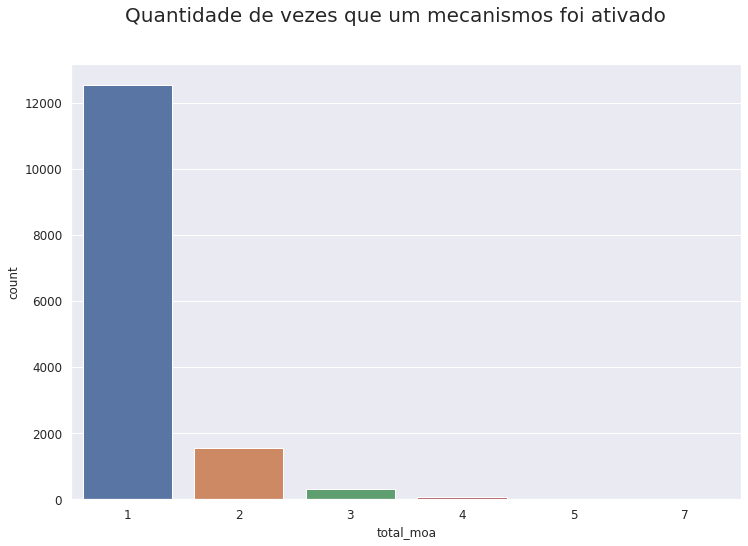

In [ ]:
sns.set()

fig, ax = plt.subplots(figsize = (12,8))  #Criando a figura
sns.color_palette("Set2") #Setando a cor

# legendas e fontes
fig.suptitle('Quantidade de vezes que um mecanismos foi ativado', fontsize=20)
ax.set_xlabel('Mecanismos Ativados', fontsize=12)
ax.set_ylabel('Quantidade De Experimentos', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


sns.countplot(ativados['total_moa'], ax=ax)
plt.show()

### Quais foram as ações que mais foram ativas 

In [ ]:
# Pandas reset_index() is a method to sets a list of integer ranging from 0 to length of data as index.

dados_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False).reset_index()
dados_moa.columns = ['MOA', 'quantidade']
dados_moa

MOA  quantidade
0                                     total_moa       16844
1                                     moa_ativo       14447
2                                nfkb_inhibitor         832
3                          proteasome_inhibitor         726
4                      cyclooxygenase_inhibitor         435
..                                          ...         ...
203                                     steroid           6
204                  nicotinic_receptor_agonist           6
205                          elastase_inhibitor           6
206                             erbb2_inhibitor           1
207  atp-sensitive_potassium_channel_antagonist           1

[208 rows x 2 columns]

Agora sabemos que:
- 16844 foi o numero total de ativações 
- 14447 é o número de experimentos que foram ativados
- E quais MOA's mais ativaram 

Vamos ver os 15 MOA's que mais ativaram  

In [ ]:
dados_moa_ativos = dados_resultados.drop(columns=['id','total_moa', 'moa_ativo']).sum().sort_values(ascending=False).reset_index()
dados_moa_ativos.columns = ['MOA', 'quantidade']
dados_moa_ativos.head(17)

MOA  quantidade
0                      nfkb_inhibitor         832
1                proteasome_inhibitor         726
2            cyclooxygenase_inhibitor         435
3        dopamine_receptor_antagonist         424
4       serotonin_receptor_antagonist         404
5                       dna_inhibitor         402
6       glutamate_receptor_antagonist         367
7      adrenergic_receptor_antagonist         360
8                       cdk_inhibitor         340
9                      egfr_inhibitor         336
10                  tubulin_inhibitor         316
11  acetylcholine_receptor_antagonist         301
12                    pdgfr_inhibitor         297
13                    hmgcr_inhibitor         283
14            calcium_channel_blocker         281
15                     flt3_inhibitor         279
16                      kit_inhibitor         273

Para facilitar a visualização vanos criara uma gráfico com as 15 ações ativadas. Para issso vamos começar adicionando uma coluna só o tipo de ação ocorrida, assim como fizemos inicialmente, para saber os tipos existentes.

Depois podemos fazer uma soma dos tipos ativados e assim saberemos quantas vezes a ação foi ativada, entre todos os experimentos.

In [ ]:
# criara uma coluna com o tipo de ação de cada MOA
ação = []

moa_split = dados_moa_ativos['MOA'].str.split('_')

ação = [item [-1] for item in moa_split ]

dados_moa_ativos ['ação'] = ação
dados_moa_ativos

MOA  quantidade        ação
0                                nfkb_inhibitor         832   inhibitor
1                          proteasome_inhibitor         726   inhibitor
2                      cyclooxygenase_inhibitor         435   inhibitor
3                  dopamine_receptor_antagonist         424  antagonist
4                 serotonin_receptor_antagonist         404  antagonist
..                                          ...         ...         ...
201               protein_phosphatase_inhibitor           6   inhibitor
202                         autotaxin_inhibitor           6   inhibitor
203                                    diuretic           6    diuretic
204                             erbb2_inhibitor           1   inhibitor
205  atp-sensitive_potassium_channel_antagonist           1  antagonist

[206 rows x 3 columns]

In [ ]:
top_15_ações = dados_moa_ativos.groupby('ação').agg({'quantidade':'sum'}).sort_values('quantidade', ascending=False).head(15)
top_15_ações = top_15_ações.reset_index()
top_15_ações

ação  quantidade
0           inhibitor        9693
1          antagonist        3449
2             agonist        2330
3             blocker         323
4               agent         150
5           activator         115
6               local          80
7         antioxidant          73
8   anti-inflammatory          73
9   immunosuppressant          73
10             medium          56
11         sensitizer          51
12          stimulant          49
13         antibiotic          43
14      antiprotozoal          36

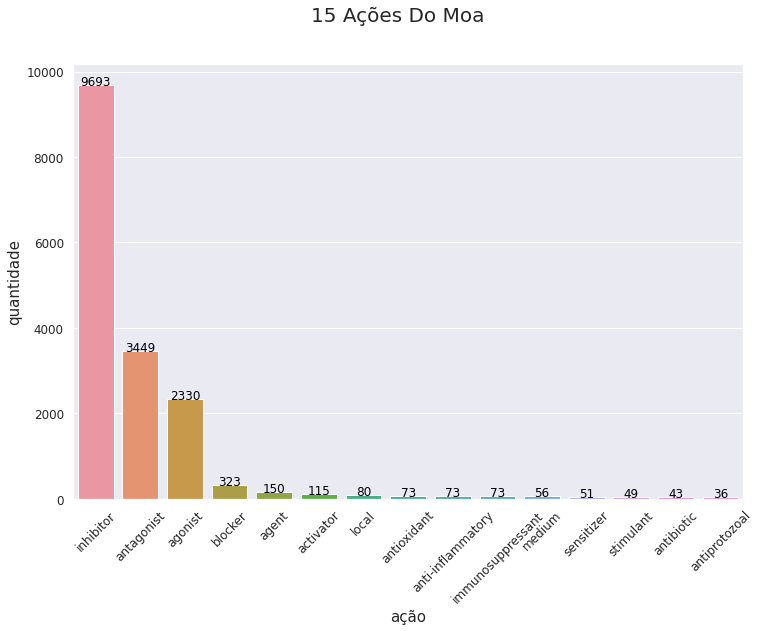

In [ ]:
sns.set()

fig, ax = plt.subplots(figsize = (12,8)) #Criando a figura
sns.color_palette("Set2") #Setando a cor

#legendas e fontes
fig.suptitle('15 Ações Do Moa', fontsize=20)
ax.set_xlabel('Ação', fontsize=15)
ax.set_ylabel('Quantidade De Ativações', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation= 45)

#Adicionando os valores acima da barra
for index, row in top_15_ações.iterrows():
    ax.text(index, row['quantidade'], row['quantidade'], color='black', ha="center", fontsize=12)



sns.barplot(data=top_15_ações, x='ação', y='quantidade', ax=ax)
plt.show()